# W207 Applied Machine Learning
## Final Project (Final Submission)
## Summer 2019, Section 5, August 2019
## Team members: Andrew Cui, Eli Hanna, Thanh Le, Edina Tankovic


# Prologue



Reddit is an online community/forum created in 2005. On reddit, users can anonymously post messages, comment on said posts, and upvote and downvote posts and comments. Reddit also has a concept of a subreddit, which are similar to forum boards and specialize in a particular topic. For instance, there are subreddits dedicated to cute pictures of baby animals, world politics, the nba, and answering questions in a simplistic way that can be understood by a five year old. 

Our project focuses on a specific subreddit: [/r/Random_Acts_Of_Pizza/](https://www.reddit.com/r/Random_Acts_Of_Pizza/). In this subreddit, users can post a request for pizza, explaining their request in the post text. Other users can then respond, and send a pizza to the requester in an act of generosity. The reciever then usually responds thanking the sender. 

We believe that there is a lot to be gleaned about human behavior, specicially on what it takes to be persuasive enough to get a random stranger to be generous enough to deliver free pizza to you. Our main focus is on predicting what it takes to get free pizza, but along the way we explore other latent factors of this active and interesting online community. 

We will be working on this project in 4 major parts. First we will set up our data, adding extra features and cleaning unrelated columns in preparation for future steps. This will be followed by a comprehensive EDA and familiarize ourself with the data. Then we will run some unsupervised techniques on the training data to glean additional insights into its structure. Finally, we will run predictive models to try to accurately predict whether a post will receive pizza. 

# Introduction / Setting Up

In this section, we imported the necessary Python packages, loaded the dataset from Reddit, subset the dataset to only those columns we need for our analysis, renamed the variables to something more meaningful, and performed a preliminary analysis to understand the data.

### Imports and Loading

Our first order of business is to organize and import all packages along with some global settings. 

In [0]:
# import necessary packages
import numpy as np
import json
import pandas as pd
import datetime

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from collections import Counter

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS 

import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTENC

Here we load our training and testing data from an online repository. We see that we have 4040 training examples and 1631 test examples. 

In [0]:
orig_train_data = pd.read_json('https://raw.githubusercontent.com/eliahanna/random_acts_of_pizza/master/random-acts-of-pizza/train.json')
orig_test_data = pd.read_json('https://raw.githubusercontent.com/eliahanna/random_acts_of_pizza/master/random-acts-of-pizza/test.json')
print ("** The shape of our train_data is ", orig_train_data.shape,"\n")
print ("** The shape of our test_data is ", orig_test_data.shape,"\n")

** The shape of our train_data is  (4040, 32) 

** The shape of our test_data is  (1631, 17) 



### Column selection and renaming


Here we will perform the test that all the columns that are present in the train data set are also present in the test data set. As it turns out, there are columns missing from the test dataset. Our analysis will focus only on the ones that are present in the both datasets. The code below will identify the differences. It is unfortunate that test data is not as complete as the train data, as judging by the names of the missing columns, they contained information that could have been helpful to our model analysis.

In [0]:
#cross match the column names across both data sets (train and test)
train_columns = pd.DataFrame({'ColumnName':list(orig_train_data.columns.values),'In Train Dataset':['Y'] * len(orig_train_data.columns.values)})
test_columns = pd.DataFrame({'ColumnName':list(orig_test_data.columns.values),'In Test Dataset':['Y'] * len(orig_test_data.columns.values)})
all_columns= pd.merge(train_columns, test_columns, on='ColumnName', how='outer')
all_columns.fillna('N', inplace=True)
#print out column matching summary
all_columns

,ColumnName,In Train Dataset,In Test Dataset
0,giver_username_if_known,Y,Y
1,number_of_downvotes_of_request_at_retrieval,Y,N
2,number_of_upvotes_of_request_at_retrieval,Y,N
3,post_was_edited,Y,N
4,request_id,Y,Y
5,request_number_of_comments_at_retrieval,Y,N
6,request_text,Y,N
7,request_text_edit_aware,Y,Y
8,request_title,Y,Y
9,requester_account_age_in_days_at_request,Y,Y


In the next step we will filter out only the ones we can use in our model analysis.

In [0]:
#make a note of the only columns we can work with going foward
good_columns=all_columns[((all_columns['In Train Dataset'] == 'Y') & (all_columns['In Test Dataset']  == 'Y')  
                          | (all_columns['ColumnName']  == 'requester_received_pizza')  #this is the variable we will try to "predict" in the test set
                         )]

#remove columns that are in both datasets but carry no value for our model
useless_columns=['giver_username_if_known', 'request_id']

for col in useless_columns:
    good_columns = good_columns[good_columns.ColumnName != col]

good_columns = good_columns.reset_index(drop=True)

#Columns we are left with
good_columns

,ColumnName,In Train Dataset,In Test Dataset
0,request_text_edit_aware,Y,Y
1,request_title,Y,Y
2,requester_account_age_in_days_at_request,Y,Y
3,requester_days_since_first_post_on_raop_at_req...,Y,Y
4,requester_number_of_comments_at_request,Y,Y
5,requester_number_of_comments_in_raop_at_request,Y,Y
6,requester_number_of_posts_at_request,Y,Y
7,requester_number_of_posts_on_raop_at_request,Y,Y
8,requester_number_of_subreddits_at_request,Y,Y
9,requester_received_pizza,Y,N


At this point we have identified all the columns we can use going forward, and we will the drop the ones we cannont use.  We will introducte one more change to the data. The remaining column names are somewhat longworded and cubersome, we will rename them to something easeier to work with.

In [0]:
rename={ ("requester_received_pizza","received_pizza"),
         ("request_text_edit_aware", "request_text"),
         ("request_title", "request_title"),
         ("requester_account_age_in_days_at_request", "account_age"),
         ("requester_days_since_first_post_on_raop_at_request", "first_post_age"),
         ("requester_number_of_comments_at_request", "total_comments"),
         ("requester_number_of_comments_in_raop_at_request", "total_comments_in_raop"),
         ("requester_number_of_posts_at_request", "total_posts"),
         ("requester_number_of_posts_on_raop_at_request", "total_posts_in_raop"),
         ("requester_number_of_subreddits_at_request", "total_subreddits"),
         ("requester_subreddits_at_request", "subreddits"),
         ("requester_upvotes_minus_downvotes_at_request", "upvotes_minus_downvotes"),
         ("requester_upvotes_plus_downvotes_at_request", "upvotes_plus_downvotes"),
         ("requester_username", "username"),
         ("unix_timestamp_of_request", "unix_timestamp"),
         ("unix_timestamp_of_request_utc", "unix_timestamp_utc")}

df_rename = pd.DataFrame(rename, columns = ['ColumnName' , 'New ColumnName']) 
final_columns= pd.merge(good_columns, df_rename, on='ColumnName', how='outer')
final_columns.fillna('N', inplace=True)
final_columns

,ColumnName,In Train Dataset,In Test Dataset,New ColumnName
0,request_text_edit_aware,Y,Y,request_text
1,request_title,Y,Y,request_title
2,requester_account_age_in_days_at_request,Y,Y,account_age
3,requester_days_since_first_post_on_raop_at_req...,Y,Y,first_post_age
4,requester_number_of_comments_at_request,Y,Y,total_comments
5,requester_number_of_comments_in_raop_at_request,Y,Y,total_comments_in_raop
6,requester_number_of_posts_at_request,Y,Y,total_posts
7,requester_number_of_posts_on_raop_at_request,Y,Y,total_posts_in_raop
8,requester_number_of_subreddits_at_request,Y,Y,total_subreddits
9,requester_received_pizza,Y,N,received_pizza


In [0]:
#Next step is to narrow down our datasets to only columns we want to keep and rename the columns. Doing train dataset here.

train_data=orig_train_data[final_columns['ColumnName'].to_list()]
name_map=final_columns[['ColumnName','New ColumnName']].set_index('ColumnName').to_dict()
train_data = train_data.rename(columns=name_map['New ColumnName'])
header=''.join(['*']*50)+'     TRAIN DATA SAMPLE head 3 records    '+''.join(['*']*50)
print (header)
train_data.head(3).T #sample check - the first 3 records 

**************************************************     TRAIN DATA SAMPLE head 3 records    **************************************************


,0,1,2
request_text,Hi I am in need of food for my 4 children we a...,I spent the last money I had on gas today. Im ...,My girlfriend decided it would be a good idea ...
request_title,Request Colorado Springs Help Us Please,"[Request] California, No cash and I could use ...","[Request] Hungry couple in Dundee, Scotland wo..."
account_age,0,501.111,0
first_post_age,0,0,0
total_comments,0,0,0
total_comments_in_raop,0,0,0
total_posts,0,15,0
total_posts_in_raop,0,0,0
total_subreddits,0,12,0
received_pizza,False,False,False


In [0]:
#Next step is to narrow down our datasets to only columns we want to keep and rename the columns. Doing test dataset here.
t_final_columns=final_columns.loc[final_columns['In Test Dataset'] == 'Y']
test_data=orig_test_data[t_final_columns['ColumnName'].to_list()]
name_map=t_final_columns[['ColumnName','New ColumnName']].set_index('ColumnName').to_dict()
test_data = test_data.rename(columns=name_map['New ColumnName'])
header=''.join(['*']*50)+'     TEST DATA SAMPLE head 3 records    '+''.join(['*']*50)
print (header)
test_data.head(3).T  #sample check - the first 3 records 

**************************************************     TEST DATA SAMPLE head 3 records    **************************************************


,0,1,2
request_text,Hey all! It's about 95 degrees here and our ki...,I didn't know a place like this exists! \n\nI ...,Hi Reddit. Im a single dad having a really rou...
request_title,[request] pregger gf 95 degree house and no fo...,"[Request] Lost my job day after labour day, st...",(Request) pizza for my kids please?
account_age,42.0839,223.785,0
first_post_age,0,0,0
total_comments,57,145,0
total_comments_in_raop,0,0,0
total_posts,10,36,0
total_posts_in_raop,0,0,0
total_subreddits,16,29,0
subreddits,"[AskReddit, COents, Denver, DenverBroncos, Lib...","[Android, AskReddit, GrandTheftAutoV, IAmA, Mi...",[]


### Check for missing values



We do not appear to have a case of missing values in any of the columns we will be working with.

In [0]:
train_data.isnull().sum().sort_values(ascending = False)

unix_timestamp_utc         0
unix_timestamp             0
username                   0
upvotes_plus_downvotes     0
upvotes_minus_downvotes    0
subreddits                 0
received_pizza             0
total_subreddits           0
total_posts_in_raop        0
total_posts                0
total_comments_in_raop     0
total_comments             0
first_post_age             0
account_age                0
request_title              0
request_text               0
dtype: int64

In [0]:
test_data.isnull().sum().sort_values(ascending = False)

unix_timestamp_utc         0
unix_timestamp             0
username                   0
upvotes_plus_downvotes     0
upvotes_minus_downvotes    0
subreddits                 0
total_subreddits           0
total_posts_in_raop        0
total_posts                0
total_comments_in_raop     0
total_comments             0
first_post_age             0
account_age                0
request_title              0
request_text               0
dtype: int64

### Add some user defined features



Here we add some user defined features that we thought would be useful but are not included in the data.

* `request_text_clean`: Cleaned version of the text of de-duplicating whitespaces. 
* `request_text_has_url`: Boolean on whether the request has a link, which may indicate a higher effort or more personal post. 
* `emoticon_smile`: Whether the request text has a positive emoticon which may reflect on the mood of the entire post. 
* `emoticon_sad`: Whether the request text has a negative emoticon which may reflect on the mood of the entire post. 
* `words_count_text`: How long the main post of the request was in words. 
* `words_count_title`: How long the title of the request was in words. 
* `day_of_week_local`: The day of the week in local time.
* `hour_local`: The hour of the post in local time.
* `hour_utc`: The hour of the post in utc. 
* `starts_with_greeting`: Are the first few words a greeting. 
 


In [0]:
#request text is full of empty strings - clean up for easier reading
train_data['request_text_clean']= train_data['request_text'].str.strip()
train_data.request_text_clean = train_data.request_text_clean.str.replace(r'( +)', r' ')
test_data['request_text_clean']= test_data['request_text'].str.strip()
test_data.request_text_clean = test_data.request_text_clean.str.replace(r'( +)', r' ')

#create new variable "Request Text has URL": some made their post interesting by providing url link to something else
train_data['request_text_has_url']=train_data['request_text_clean'].str.contains("http")
test_data['request_text_has_url']=test_data['request_text_clean'].str.contains("http")

#create new variable "Smile emoticon": :-) or :)
train_data['emoticon_smile']= bool(0)
train_data.loc[(train_data['request_text_clean'].str.contains(":-\)")) , 'emoticon_smile'] = bool(1)
train_data.loc[(train_data['request_text_clean'].str.contains(":\)")) , 'emoticon_smile'] = bool(1)
test_data['emoticon_smile']= bool(0)
test_data.loc[(test_data['request_text_clean'].str.contains(":-\)")) , 'emoticon_smile'] = bool(1)
test_data.loc[(test_data['request_text_clean'].str.contains(":\)")) , 'emoticon_smile'] = bool(1)

#create new variable "Sad emoticon": :-(  or :(
train_data['emoticon_sad']= bool(0)
train_data.loc[(train_data['request_text_clean'].str.contains(":-\(")) , 'emoticon_sad'] = bool(1)
train_data.loc[(train_data['request_text_clean'].str.contains(":\(")) , 'emoticon_sad'] = bool(1)
test_data['emoticon_sad']= bool(0)
test_data.loc[(test_data['request_text_clean'].str.contains(":-\(")) , 'emoticon_sad'] = bool(1)
test_data.loc[(test_data['request_text_clean'].str.contains(":\(")) , 'emoticon_sad'] = bool(1)

#create new variables how long is the text. 
train_data["words_count_text"] = train_data.apply(lambda row: len(row.request_text_clean.split()), axis = 1)
train_data["words_count_title"] = train_data.apply(lambda row: len(row.request_title.split()), axis = 1)
test_data["words_count_text"] = test_data.apply(lambda row: len(row.request_text_clean.split()), axis = 1)
test_data["words_count_title"] = test_data.apply(lambda row: len(row.request_title.split()), axis = 1)

#create new variables related to time of text
train_data["day_of_week_local"] = train_data.apply(lambda row: datetime.datetime.utcfromtimestamp(row.unix_timestamp).weekday(), axis = 1)
train_data["hour_local"] = train_data.apply(lambda row: datetime.datetime.utcfromtimestamp(row.unix_timestamp).hour, axis = 1)
train_data["hour_utc"] = train_data.apply(lambda row: datetime.datetime.utcfromtimestamp(row.unix_timestamp_utc).hour, axis = 1)
test_data["day_of_week_local"] = test_data.apply(lambda row: datetime.datetime.utcfromtimestamp(row.unix_timestamp).weekday(), axis = 1)
test_data["hour_local"] = test_data.apply(lambda row: datetime.datetime.utcfromtimestamp(row.unix_timestamp).hour, axis = 1)
test_data["hour_utc"] = test_data.apply(lambda row: datetime.datetime.utcfromtimestamp(row.unix_timestamp_utc).hour, axis = 1)

#create new variable if the text had greeting
def starts_with_greeting(aString):

  answer= aString.upper().startswith("HI") or \
          aString.upper().startswith("GOOD MORNING") or \
          aString.upper().startswith("HEY") or \
          aString.upper().startswith("GOOD AFTERNOON") or \
          aString.upper().startswith("GOOD EVENING") or \
          aString.upper().startswith("DEAR") or \
          aString.upper().startswith("HOWDY") or \
          aString.upper().startswith("FRIENDS") 
  return answer

train_data["starts_with_greeting"] =train_data['request_text'].apply(starts_with_greeting)


# EDA

Here, we digged deeper into the dataset and created new variables to assist in our understanding of the story behind it.  What is the correlations between all the variables?  Who gets pizza and potentially why.  

### Simple Describe

First we can describe the numeric and boolean columns of our data. We immediately see that around 75% posts did not get pizza which indicates a class imbalance. Otherwise there is great variance in all features related to account/post age the as well as number of comments/posts/upvotes. Of our added features, it seems that there are actually a lot of posts with urls and emoticons, and the word count for posts seems to mostly be under 200 indicating that most users are posting walls of text. Additionally, there seems to be no major errors in the distribution of any of the temporal features we added. 

Train set has total 4040 entries with 24.60% postive, 75.40% negative responses in 'received_pizza' variable


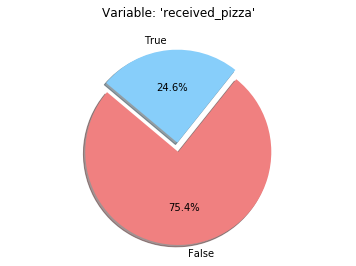

In [0]:
#Quick look at how our prediction variable is split in the train set.
true_rec_pizza_count=len(train_data.loc[train_data['received_pizza']==True])
flase_rec_pizza_count=len(train_data.loc[train_data['received_pizza']==False])

print ("Train set has total {0} entries with {1:.2f}% postive, {2:.2f}% negative responses in 'received_pizza' variable".format(len(train_data),
       (true_rec_pizza_count/len(train_data) )*100,
        (flase_rec_pizza_count/len(train_data) )*100))

 
# Data to plot
labels = 'False', 'True'
sizes = [flase_rec_pizza_count, true_rec_pizza_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Variable: 'received_pizza'\n")
plt.axis('equal')
plt.show()

In [0]:
#some basic statistics about our data
description=train_data.describe(include=[np.number, np.bool])
description.fillna('', inplace=True)
description.T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
account_age,4040,,,,254.587,303.276,0,3.47317,157.067,390.093,2809.75
first_post_age,4040,,,,16.417,70.6514,0,0,0,0,785.458
total_comments,4040,,,,115.098,193.319,0,0,24,140.25,994
total_comments_in_raop,4040,,,,0.64505,3.41381,0,0,0,0,88
total_posts,4040,,,,21.6015,50.8951,0,0,5,22,867
total_posts_in_raop,4040,,,,0.0636139,0.325773,0,0,0,0,5
total_subreddits,4040,,,,18.0767,21.7365,0,1,11,27,186
received_pizza,4040,2,False,3046,,,,,,,
upvotes_minus_downvotes,4040,,,,1160.08,3718.37,-173,3,174.5,1163.75,155010
upvotes_plus_downvotes,4040,,,,3743.24,25838.2,0,9,351,2303.75,1.28686e+06


### Illuminating examples

The main question here we were trying to answer was 2 part, what makes people request a pizza and, in turn, what makes people answer that request. We felt that amount of data we were given was pretty limiting. This study is a classic example of matching donors and recipients. We drew a parallel in medical terms to donors and recipients, who have to have something in common in order to be matched. While this was not a classic medical situation, we were trying to establish this connection. From personal experience we knew that people are likely to donate to causes they feel a special connection to.  Do you give your money to a hard working student stuck in empty student hall during holidays, out of money single mom, or a lazy guy who could not think of another way to get his pizza? A couple of variables would have been really helpful to have, like, how many posts donor read before deciding to give one, a profile of the donor (for example causes donated to in the past). Many people were making promises to donate pizza in return, it made us wonder how many actually followed through. Another thing we were curious about if there was a ‘happy hour’, maybe particular time during week when people were likely to donate, call it ‘pizza happy hour’. People do not respond to number of words one has written, they respond to the effect these words have on them. Another question we were trying to answer was do people respond to more polite requests that started with a greeting?

In this section, we picked out three very illuminating examples showing the difficulty of this work. In the first example, there is our typical request with some positive votes which got pizza. In this case, some stranger seemed happy to help another cheat on their diet. However, in the second case, an Air Force veteran received a lot of upvotes and a smiley, but was denied pizza. Finally the last post got negative votes, perhaps by coming across and not genuine or too aggressive in the request, but some stranger seemed happy to oblige and sent a pizza.  

In [0]:
#the text strings are long, this will ensure the print fits the screen in jupiter notebook
def print_chunk_string(x, chunk_size):
  chunks=len(x)
  for i in range(0, chunks, chunk_size):
    print(  x[i:i+chunk_size])
  
line_char_break=120
#pick up a couple of interesting sample to illustrate data 
idx_sample_responses=[5, 4, 76]
print (''.join(['_']*120),"\n")

#sample1: total votes positive - got pizza
print ("\n********** SAMPLE 1 (idx 140): total votes positive - received pizza **********\n")
print_chunk_string( train_data.ix[5, "request_text_clean"],line_char_break)
print (''.join(['_']*120),"\n")

#sample2: total votes positive - no pizza
print ("********** SAMPLE 2 (idx 1051): total votes very positive - no pizza **********\n")
print_chunk_string( train_data.ix[4, "request_text_clean"],line_char_break)
print (''.join(['_']*120),"\n")

#sample3: total votes negative - got pizza
print ("********** SAMPLE 3 (idx 1052): total votes negative - received pizza **********\n")
print_chunk_string( train_data.ix[76, "request_text_clean"],line_char_break)
print (''.join(['_']*120),"\n")



________________________________________________________________________________________________________________________ 


********** SAMPLE 1 (idx 140): total votes positive - received pizza **********

Feeling under the weather so I called out off work today! I hate requesting because I feel like I'm begging so I thought
 I'd give back! 

(I'd offer pizza if today were payday :C)
________________________________________________________________________________________________________________________ 

********** SAMPLE 2 (idx 1051): total votes very positive - no pizza **********

hey guys:
 I love this sub. I think it's great. (Except the sob stories. I miss when this place was fun!) Anywho, I've g
iven a pizza out before so thought I would try my luck at getting one. My friend, who lives an hour away and our schedul
es do not let us see each other too much, decided to come down and visit me for the night! I would love to be able to be
 a good host and order her a pizza to go with s

In [0]:
#transpose samples to better compare feature values. 
samples=train_data.iloc[idx_sample_responses].T
samples

,5,4,76
request_text,Feeling under the weather so I called out off ...,hey guys:\n I love this sub. I think it's grea...,"Hello fellow humans, another sad story is the ..."
request_title,[REQUEST] I'll give a two week xbox live code ...,[Request] Old friend coming to visit. Would LO...,"(Request) Hungry single mother, NO food until ..."
account_age,582.777,162.063,0
first_post_age,340.819,101.607,0
total_comments,63,140,0
total_comments_in_raop,1,2,0
total_posts,24,14,0
total_posts_in_raop,0,0,0
total_subreddits,21,11,1
received_pizza,True,False,True


### Histogramming Features




In this section, we will examine some of the distributions of interesting variables, looking for insight into which variables show drastically different distributions for requests that received pizza and those that didn't. 
Our first step is to look at the correlation matrix of the variables present in the file. 
We notice some obvious correlations such as:
- 'upvotes_minus_downvotes <->'upvotes_plus_downvotes'
- 'total_comments'<->'total_subreddits'
- 'account_age'<->'total_subreddits'

None of them stand out as something that will help our modelling.

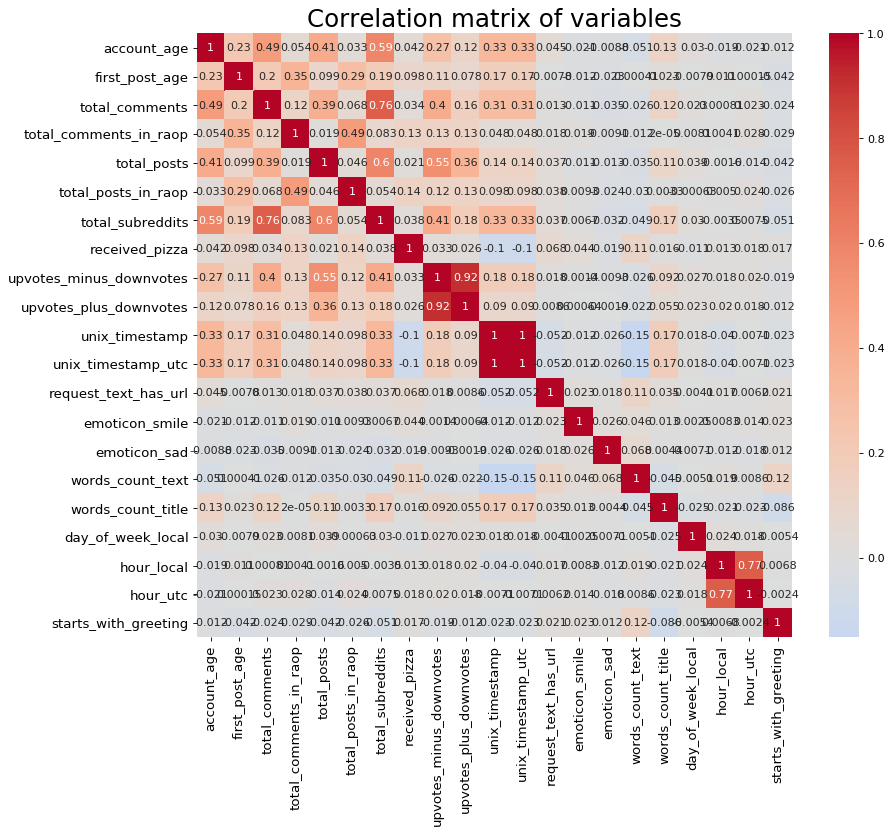

In [0]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(train_data.corr(), xticklabels=train_data.corr().columns, yticklabels=train_data.corr().columns, cmap='coolwarm', center=0, annot=True)

# Decorations
plt.title('Correlation matrix of variables', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [0]:
pizza_true = train_data.loc[train_data["received_pizza"] == True]
pizza_false = train_data.loc[train_data["received_pizza"] == False]
train_pizza = train_data.groupby(by=['received_pizza'])
train_pizza_avg = train_pizza.mean()

This histogram shows that among short posts, the distribution is likely the same. However, we see than when we move to posts with length 150-300 words or so, that the orange histogram is comparatively higher than before, perhaps indicating that longer posts may be more likely to receive more pizza. It is difficult to see such an effect on the title length though. Indeed we can see this effect in the averages for each label as well. 

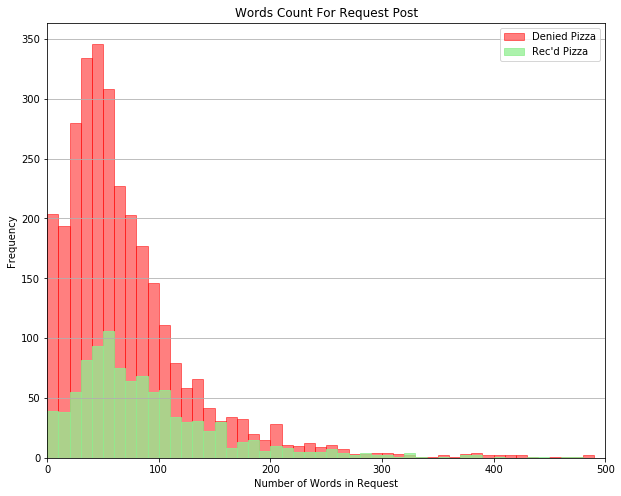

received_pizza
False    71.639527
True     89.928571
Name: words_count_text, dtype: float64

In [0]:
plt.figure(figsize=(10,8))
plt.hist(pizza_false["words_count_text"], np.arange(0,500,10), alpha=0.5, label="Denied Pizza", color = "red", ec="red")
plt.hist(pizza_true["words_count_text"], np.arange(0,500,10), alpha=0.75, label="Rec'd Pizza", color = "lightgreen", ec="lightgreen")
plt.legend(loc="upper right")
plt.title("Words Count For Request Post")
plt.xlabel("Number of Words in Request")
plt.xlim(0,500)
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.show()
train_pizza_avg["words_count_text"]

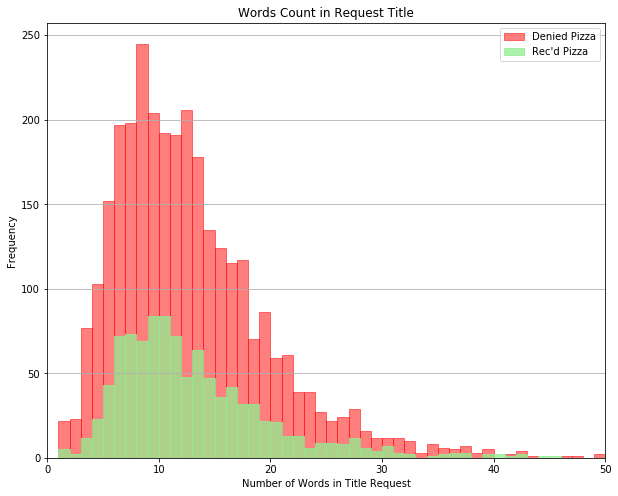

received_pizza
False    12.360144
True     12.613682
Name: words_count_title, dtype: float64

In [0]:
plt.figure(figsize=(10,8))
plt.hist(pizza_false["words_count_title"], np.arange(0,60,1), alpha=0.5, label="Denied Pizza", color = "red", ec="red")
plt.hist(pizza_true["words_count_title"], np.arange(0,60,1), alpha=0.75, label="Rec'd Pizza", color = "lightgreen", ec="lightgreen")
plt.legend(loc="upper right")
plt.title("Words Count in Request Title")
plt.xlabel("Number of Words in Title Request")
plt.xlim(0,50)
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.show()
train_pizza_avg["words_count_title"]

Here we see something interesting as well. There are a lot of posts from brand new accounts with 0 previous posts. It is hard to say for certain, but it seems that these new accounts get denied at a higher rate than accounts with previous posts, which makes sense as new accounts are more likely to be from trolls or relatively new strangers to the reddit community. This is also reflected in the averages for both classes. 

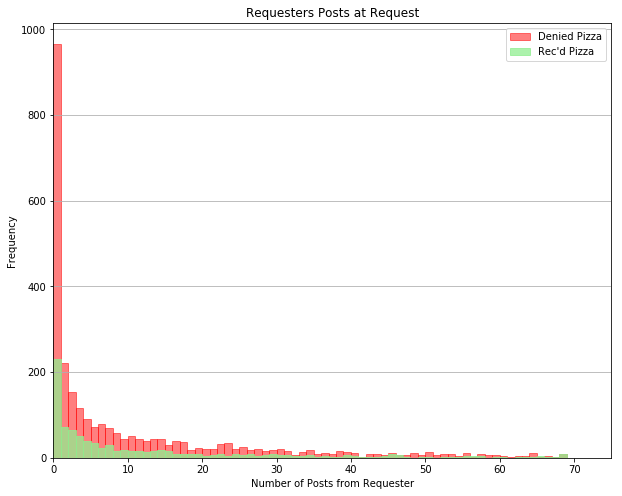

received_pizza
False    21.002298
True     23.437626
Name: total_posts, dtype: float64

In [0]:
plt.figure(figsize=(10,8))
plt.hist(pizza_false["total_posts"], np.arange(0,70,1), alpha=0.5, label="Denied Pizza", color = "red", ec="red")
plt.hist(pizza_true["total_posts"], np.arange(0,70,1), alpha=0.75, label="Rec'd Pizza", color = "lightgreen", ec="lightgreen")
plt.legend(loc="upper right")
plt.title("Requesters Posts at Request")
plt.xlabel("Number of Posts from Requester")
plt.xlim(0,75)
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.show()
train_pizza_avg["total_posts"]

Once again, it seems as if there is a patch of very popular posts above 2k net upvotes where the orange histogram is relatively much higher compared the blue histogram than for posts below 2k. These popular posts may also receive more pizza, which is expected as they rise to the top of the subreddit and have the most visibility. Looking at the averages, the average succesful request garnered 300 more votes than those denied. 

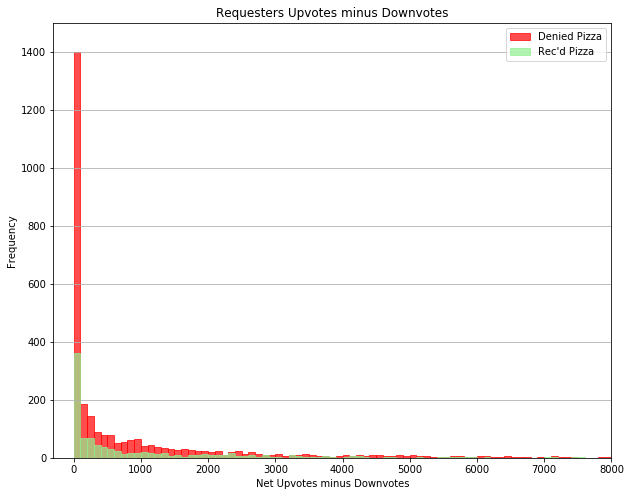

received_pizza
False    1090.904465
True     1372.060362
Name: upvotes_minus_downvotes, dtype: float64

In [0]:
plt.figure(figsize=(10,8))
plt.hist(pizza_false["upvotes_minus_downvotes"], np.arange(0,10000,100), alpha=0.7, label="Denied Pizza", color = "red", ec="red")
plt.hist(pizza_true["upvotes_minus_downvotes"], np.arange(0,10000,100), alpha=0.7, label="Rec'd Pizza", color = "lightgreen", ec="lightgreen")
plt.legend(loc="upper right")
plt.title("Requesters Upvotes minus Downvotes")
plt.xlabel("Net Upvotes minus Downvotes")
plt.xlim(-300,8000)
plt.ylim(0,1500)
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.show()
train_pizza_avg["upvotes_minus_downvotes"]

Next we take a quick look at the new variables we created (emoticon_smile,emoticon_sad, request_text_has_url), and their relationship to 'received_pizza' variable. It seems as if some days of the week and hours of the day are more active and users more likely to receieve pizza, which makes sense. Additionally, positive emoticons and urls seem to have an small positive effect on the probability of receiving pizza as well. 

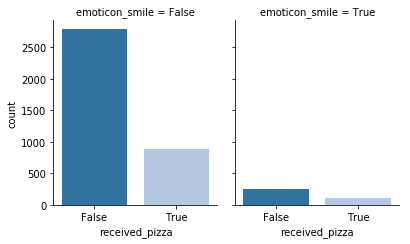

In [0]:
g1=sns.catplot("received_pizza", col="emoticon_smile", col_wrap=2,
                data=train_data,
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')

plt.show()

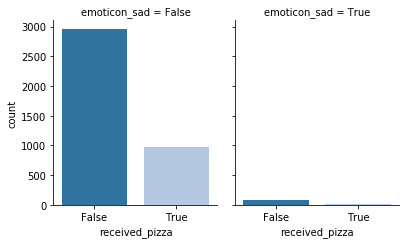

In [0]:
g2 = sns.catplot("received_pizza", col="emoticon_sad", col_wrap=2,
                data=train_data,
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')
plt.show()

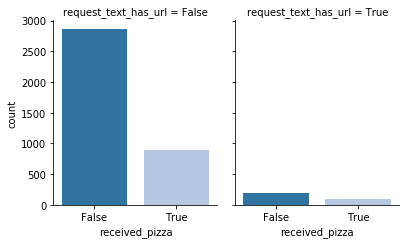

In [0]:
g3 = sns.catplot("received_pizza", col="request_text_has_url", col_wrap=2,
                data=train_data,
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')
plt.show()

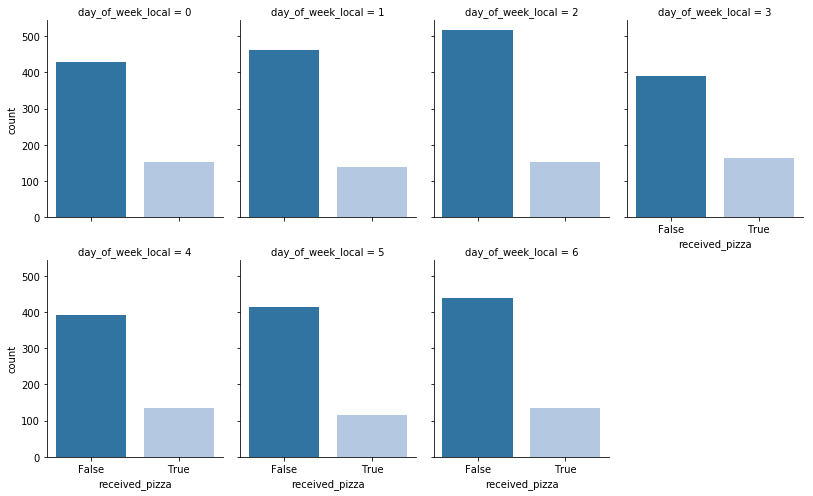

In [0]:
g4 = sns.catplot("received_pizza", col="day_of_week_local", col_wrap=4,
                data=train_data,
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')
plt.show()

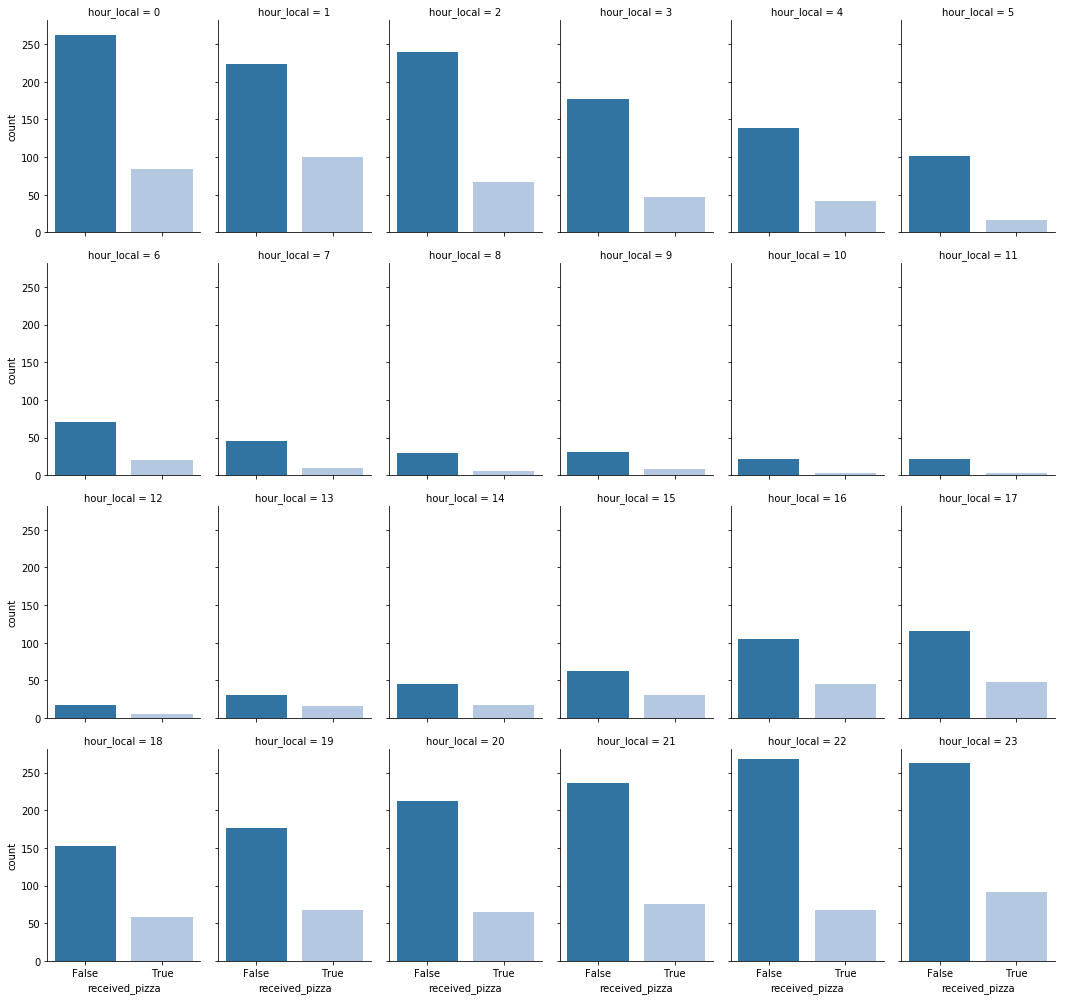

In [0]:
g5 = sns.catplot("received_pizza", col="hour_local", col_wrap=6,
                data=train_data,
                kind="count", height=3.5, aspect=.7, 
                palette='tab20')
plt.show()

### Word Importance

In this section we seek to find some example words which may provide and indication as to if a poster is likely to receive pizza or not. We do this by looking at common words in the request text, and looking at the percentage of posts containing that word receive or are denied pizza. 

In [0]:
request_words = ""
stopwords = set(STOPWORDS) 

pizza_true_counts = {}
pizza_false_counts = {}

# iterate through the column
for val in pizza_true["request_text_clean"]:
  
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.lower().split()
    
    for word in tokens:
      if not word in pizza_true_counts:
        pizza_true_counts[word] = 0
      pizza_true_counts[word] += 1
  
  # iterate through the column
for val in pizza_false["request_text_clean"]:
  
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.lower().split()
    
    for word in tokens:
      if not word in pizza_false_counts:
        pizza_false_counts[word] = 0
      pizza_false_counts[word] += 1

First we can look for words with a high ratio, meaning that they are more likeley to be in succesful posts that receive pizza. They key words here seem to be exchange, bucks, aid, cover, and posted. "Exchange" and "bucks" are interesting as they suggest a poster may be willing to pay for pizza (perhaps later) and these exchanges are viewed more favorably.  

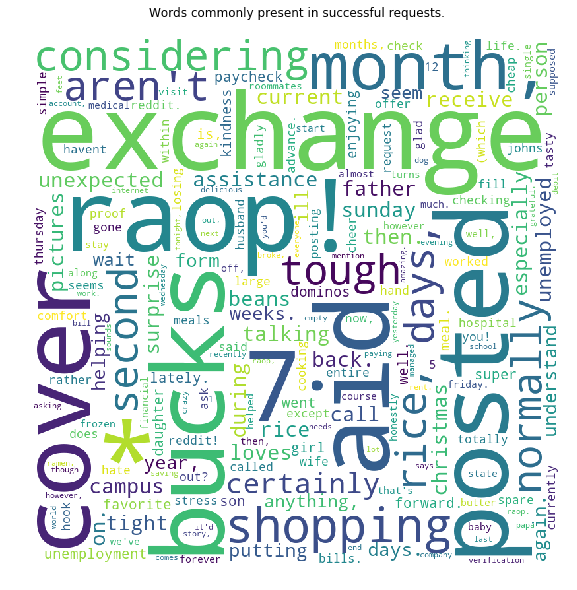

In [0]:
pizza_ratio = {}

for k,v in pizza_true_counts.items():
  if k in pizza_false_counts and v > 10 and pizza_false_counts[k] > 10:
    ratio = v/(pizza_false_counts[k] + v)
    pizza_ratio[k] = ratio

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = "white", 
                      stopwords = stopwords, 
                      min_font_size = 10).generate_from_frequencies(pizza_ratio) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Words commonly present in successful requests.\n")
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

We can also look for words with a low ratio, meaning that they are more likeley to be in denied posts that do not receive pizza. They key words here seem to be free, room, and friend. Perhaps this means that posts that may be seeking free handouts or appealing to the pathos of readers by referring to them as friends come across as disingenuous and are thus ignored. 

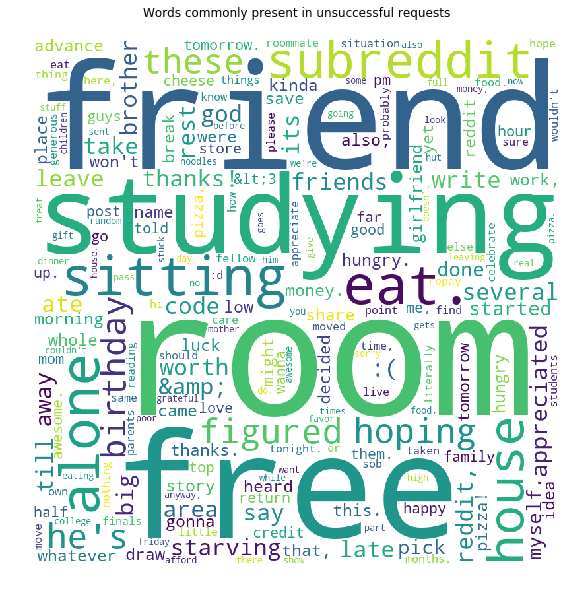

In [0]:
pizza_ratio = {}

for k,v in pizza_true_counts.items():
  if k in pizza_false_counts and v > 10 and pizza_false_counts[k] > 10:
    ratio = pizza_false_counts[k]/(pizza_false_counts[k] + v)
    pizza_ratio[k] = ratio
    
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = "white", 
                      stopwords = stopwords, 
                      min_font_size = 10).generate_from_frequencies(pizza_ratio) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Words commonly present in unsuccessful requests\n")
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Dimensionality Reduction and Clustering

In this section we will use CountVectorizer to represent the request text as a bag of words. This will create a sparse matrix with many features. To address this, we will perform a dimensionality reduction technique on the data. We will use TruncatedSVD instead of PCA because PCA does not work well on sparse matrices. Finally, we will apply an unsupervised learning technique (KNeighborsClassifier) to group the data into clusters. These clusters may be useful in our supervised learning below.

Original Train Shape: (4040, 26)
Train Shape After CV: (4040, 12354)


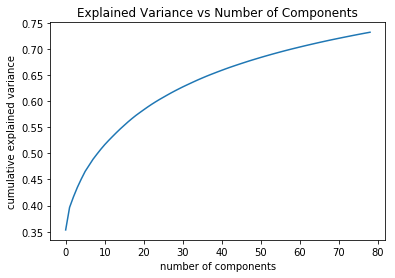

Explained variance: 0.7317020182710138


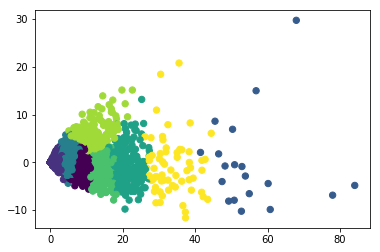

In [0]:
# Use CountVectorizer to represent request text as a bag of words.
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')


# transform the train request text
train_req_text = train_data['request_text']
train_bag = count_vect.fit_transform(train_req_text)


#Looking at the shape
print('Original Train Shape: ' + str(train_data.shape))
print('Train Shape After CV: ' + str(train_bag.shape))

# PCA doesn't work with a sparse matrix but TruncatedSVD does
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
from sklearn.decomposition import TruncatedSVD


# We really need a lot of components to get much variance explained...
num_components = list(range(1,80))

for n in num_components:
  svd = TruncatedSVD(n_components = n, random_state = 42)
  train_svd = svd.fit_transform(train_bag)
  explained_variance = str(round(sum(svd.explained_variance_ratio_),3))

plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Explained Variance vs Number of Components')
plt.show()

print('Explained variance: ' + str(svd.explained_variance_ratio_.sum()))


# Run kmeans and plot result
  
kmeans = KMeans(n_clusters=8, random_state=0)

train_labels = kmeans.fit(train_svd).predict(train_svd)

plt.scatter(train_svd[:, 0], train_svd[:, 1], c=train_labels, s=40, cmap='viridis');



After experimentation, we found that reducing dimensionality to 80 dimensions was ideal. By doing this, we explained 73% of the variance in our data. We also decided to run K-means with 8 clusters. Plotting these cluster values out, we can see that the clustering is not as natural as we would have hoped. However, by taking a few examples from each cluster, we can gain insights into what each cluster represents. Most obviously, cluster 7 is contains long posts with very active users. These users post in multiple other subreddits and their posts gain a lot of voting activity as well. This would be a very interesting cluster to focus on for a targeted analysis, perhaps to understand who these users are and how they word their posts. 

In [0]:
# add the labels to train_data so we can use it later
train_labels = np.reshape(train_labels, (-1,1))
train_clusters = pd.DataFrame(train_labels)
train_clusters.columns = ['cluster']
train_data = pd.concat([train_data, train_clusters], axis = 1)
train_data.groupby('cluster').apply(lambda df: df.sample(2))

request_text  ... cluster
cluster                                                          ...        
0       3474  I recently moved out to AZ from LV and well......  ...       0
        1654  I don't have a sob story or any of that kind o...  ...       0
1       2916  Roommates and girlfriend out of town, sitting ...  ...       1
        3012                       Blasting music and hungry :(  ...       1
2       1769  So, Here is the story, it starts on Thursday 2...  ...       2
        1728  [Request] Out of Saint Louis Missouri. (Specif...  ...       2
3       2223  Lost my job at an insurance company this past ...  ...       3
        1713  Basically i have work at 3 woke up with no foo...  ...       3
4       1266  Just spent almost $1600 on my car to get it th...  ...       4
        2099  Hello, my name is Bret and I'm originally from...  ...       4
5       655   My rent check, student loan payment, &amp; car...  ...       5
        2874  Yesterday I was pickpocketed while taking the ...  ...       5
6       2480  Hello, we've posted before when we first got t...  ...       6
        216   Worst week of our lives. My husband and I have...  ...       6
7       1913  I don't want to post from my main, but I've be...  ...       7
        440   I preemptively realize that this post is at a ...  ...       7

[16 rows x 27 columns]

# Supervised Prediction Model

In this section, we selected the Random Forest machine learning model as our main predicting model (amongst all the other ones we had tested and examined), and explored ways to further improved the accuracy of its predictions.

### Random Forest

For this section, we will use random forests to try to predict if a post received pizza or not. We do this because random forests are relatively simple, interpretable, and work well on non-normalized features. 

First we have to extract all the columns with non-text data that we can process. We then break out a third of our data to use as a validation set. 

In [0]:
train_columns = ['total_posts_in_raop',
                'total_comments_in_raop',
                'words_count_text',
                'words_count_title',
                'first_post_age',
                'request_text_has_url',
                'emoticon_smile',
                'account_age',
                'total_subreddits',
                'total_comments',
                'upvotes_minus_downvotes',
                'upvotes_plus_downvotes',
                'total_posts',
                'emoticon_sad',
                'cluster',
                'day_of_week_local', 
                'hour_local',
                'starts_with_greeting'
                ]

X_sup = train_data[train_columns]
Y_sup = train_data["received_pizza"].to_numpy()

X_sup_train, X_sup_dev, Y_sup_train, Y_sup_dev = train_test_split(X_sup, Y_sup, test_size=0.33, random_state=42)

Let's see what happens with a random forest. We use GridSearchCV to find the optimal set of paramaters. Left unchecked, GridSearchCV tries to minimize the number of features and max depth and predict everything as false.  This is because our labels are unbalanced (~75.5% false in the training data). We counter this my limiting the range of potential values for those paramaters and by setting class_weight = 'balanced'.

In addition, the number of estimators (20) was the result of additional testing. Since the grid search took a long time to run with many different estimators, we simply set this value.

Our best model has a mean validation score of 0.663 and the following paramaters:


*   bootstrap = True
*   criterion = gini
*   max_features = 10
*   min_samples_split = 3


 



In [0]:
clf = RandomForestClassifier(n_estimators = 20, max_depth = 5, random_state=0, class_weight ='balanced')

param_grid = {
    "max_features": [3, 10, 15, 17],
    "min_samples_split": [2, 3],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
}

grid_search = GridSearchCV(clf, param_grid=param_grid, iid=False)

grid_search.fit(X_sup_train, Y_sup_train)

#print(sklearn.metrics.f1_score(grid_search.predict(X_sup_dev),Y_sup_train, average="weighted"))
#print(sklearn.metrics.accuracy_score(grid_search.predict(X_sup_dev),Y_sup_train))
#print(grid_search.best_params_)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.663 (std: 0.026)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 10, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.662 (std: 0.021)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 10, 'min_samples_split': 2}

Model with rank: 3
Mean validation score: 0.662 (std: 0.009)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 3, 'min_samples_split': 3}



When using the development data, this model has an accuracy score of 65% and an F-1 score of 0.633.


In [0]:
# make predictions using the best model
clf = grid_search.best_estimator_

X_sup_dev_prediction = clf.predict(X_sup_dev)
X_sup_dev_prediction_proba = clf.predict_proba(X_sup_dev)

print("Accuracy score: " + "{:.3f}".format(sklearn.metrics.accuracy_score(X_sup_dev_prediction,Y_sup_dev)))
print("F-1 score: " + "{:.3f}".format(sklearn.metrics.f1_score(X_sup_dev_prediction,Y_sup_dev, average="weighted")))

Accuracy score: 0.651
F-1 score: 0.633


Since our outcome variable is unbalanced, we want to be sure our model is not just predicting one class so we check the percent of false cases in the predictions against the false cases in the training data. Our model predicted 64.39% of the cases to be false. This is somewhat surprising since the training set has 75.5% of the examples labeled false. Despite the surprise, we are confident our model is actually making predictions and not just guessing the most common label. 

In [0]:
prediction_count = Counter(X_sup_dev_prediction)
pred_false = prediction_count[0]
pred_true = prediction_count[1]
pred_total = pred_false + pred_true

pred_percent_false = pred_false/pred_total

print('Number of rows predicted false: ' + str(pred_false))
print('Number of rows predicted true: '+ str(pred_true))
print('Percent of rows predicted false: ' + "{:.2f}".format(pred_percent_false*100) +'%')


train_label_count = Counter(Y_sup_train)
train_false = train_label_count[0]
train_true = train_label_count[1]
train_total = train_false + train_true

train_percent_false = train_false/train_total

print('\nNumber of training rows labeld false: ' + str(train_false))
print('Number of training rows labeld true: '+ str(train_true))
print('Percent of training rows labeld false: ' + "{:.2f}".format(train_percent_false*100) +'%')

Number of rows predicted false: 859
Number of rows predicted true: 475
Percent of rows predicted false: 64.39%

Number of training rows labeld false: 2043
Number of training rows labeld true: 663
Percent of training rows labeld false: 75.50%


Since decision trees make their decision splits by taking a feature and a threshold to try to minize the Gini impurity, we can measure the importance of various features by measuring what proportion of the total Gini impurity decrease splits with that feature account for. Features with higher importance in this scheme are present in a lot of important splits per tree. We see that in this account, the most important features are: 


*   Word count of the main body of the post
*   Gross votes
*   Net votes received
*   The number of total comments in RAOP
*   Age of the account

These are all sensible, as high traffic popular and detailed posts from a well known and long-active user intuitively should attract more pizza.  


 Feature Importance
 1) words_count_text               0.230131
 2) upvotes_plus_downvotes         0.126100
 3) upvotes_minus_downvotes        0.095836
 4) total_comments_in_raop         0.068838
 5) account_age                    0.060424
 6) first_post_age                 0.050613
 7) hour_local                     0.050453
 8) words_count_title              0.049615
 9) cluster                        0.049519
10) total_comments                 0.047354
11) total_posts                    0.043371
12) day_of_week_local              0.040733
13) total_subreddits               0.039879
14) total_posts_in_raop            0.029279
15) request_text_has_url           0.009849
16) emoticon_smile                 0.003153
17) starts_with_greeting           0.002886
18) emoticon_sad                   0.001969


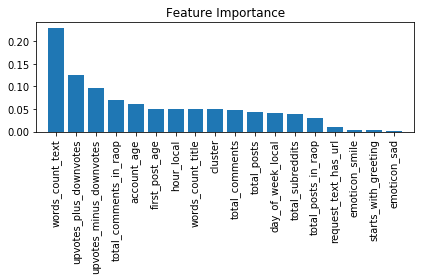

In [0]:
print("\n Feature Importance")
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]
for f in range(X_sup_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, train_columns[indices[f]], importances[indices[f]]))
  
plt.title("Feature Importance")
plt.bar(range(X_sup_train.shape[1]), importances[indices], align = 'center')

plt.xticks(range(X_sup_train.shape[1]), X_sup.columns[indices] ,rotation = 90)

plt.xlim([-1, X_sup_train.shape[1]])

plt.tight_layout()
plt.show()


fpr, tpr, threshold = sklearn.metrics.roc_curve(Y_sup_dev, X_sup_dev_prediction_proba[:,1])
roc_auc = sklearn.metrics.auc(fpr, tpr)
half_threshold_index = np.argmin(np.abs(threshold-0.5))



Since our decision forest is an ensemble, we can predict the probability of each class by simply using the fraction of trees that predicted that class. From this probability prediction, we can quote an ROC-AUC metric of 0.638, which is also better than a random guessing model. We can plot this ROC curve, and since we know that our random forest uses a threshold of 0.5 to determine the final class, plot a green X for where our model lies on this ROC curve. 

ROC AUC: 0.638


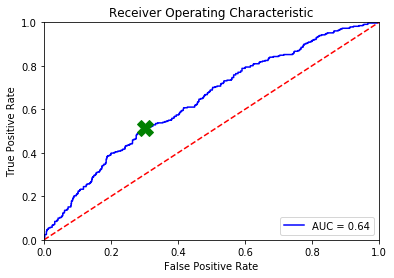

In [0]:
print("ROC AUC: " + "{:.3f}".format(roc_auc))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr[half_threshold_index], tpr[half_threshold_index], "gX", markersize=16)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Conclusion

### Overall Results

Our goal was to predict if a post on the Random Acts of Pizza subreddit would receive pizza or not. Were we succesfull in that? Our best model was far from perfect with an AUC score of 0.638.  We experimented with various methods and machine learning models (Naives Bayes, Decision Tree, implementing stop words and oversampling method), in an attempt to improve our model's accuracy without sacrificing balanced predictions.  While there is room for improvement our model is better than random and demonstrates that there are some key factors that can make a post more likely to receive pizza. The top 5 most important features in the data were:


*  Word count of the main body of the post
       Lengthy request could imply the author is genuine in the ask (spending the time and effort), would potentially sound more polite
*   Gross votes
        More votes mean more views, more chances to get that one person to grant pizza
*   Net votes received
        Similar to gross votes
*   The number of total comments in RAOP
        Similarly, more comments mean someone is not just viewing the post, but actually reading the post, also implying that one gets a better chance of convincing that one reader to grant a pizza
*   Age of the account
        Perhaps, this is a metric potential pizza giver / readers use to assess whether this requester is credible, that this is a genuine ask by a true account user and not just someone who wants free pizza for the night

These suggest that requests that are highly engaging (word count, high gross, net votes) and from active users (total comments in RAOP and age of the account) are more likely to receive pizza.

The bottom line is that we are unable to prescribe a specific formula to guarantee a user will receive a pizza but can recommend that users put time and  effort into writing an engaging request and building rapport in the subreddit to improve their chances. 

### What Went Well

Our EDA provided us with a foundational understanding of the data but we also developed domain knowledge by browsing the Random Acts of Pizza subreddit. This helped us to develop an intuition about the data and posed questions that we were able to answer in our EDA. 

### What Didn't Work Well

The nature of strangers acting altruistically over the internet is a complex subject. Our findings reflect this fact. While we were able to build a model that performs better than random, several factors contributed to our limited results. 



*   **Unbalanced Training Data** in our training data, roughly 75% of all posts did not receive pizza. This forced some of our decisions to design our models to prevent them from simply predicting "false" in all cases. It also forced us to not rely on accuracy as our only metric, but to look at AUC and the tradeoff between true and false positives. 
*   **Dealing with Sparse Matrices** Our decision to analyze the text of the request with CountVectorizer resulted in a sparse matrix. Our original plan was to then reduce the dimensionality of the result using Principle Component Analysis (PCA). Unfortunately, PCA does not work well with sparse matricies so we had to look to alternative methods, ultimately chosing TruncatedSVD.



### Comparison: The Stanford Study 

At the end of our modeling process, we compared our results to those in the [Stanford paper](http://snap.stanford.edu/class/cs224w-2013/projects2013/cs224w-025-final.pdf) originally published about this dataset. In that paper, the authors used a lot of the same EDA and features that we performed. They attempted to cluster the data into topics which seems more robust than trying to automatically find cluster labels. They also added features for sentiment, length, time, and account status which we have included as well. They additionally added unigram features for key words, included the raw text for some models, and analyzed the actual network of users, which we did not. Their final model had an AUC metric of 0.672, while our best AUC is on par with their best model without using the raw text. 

### Key Takeaways

The way humans interact online, even in a very structured setting that limits posts to be asking for free pizza favors, is extremely noisy. It is difficult to get any meaningfully accurate predictions from a model trained on this data. However, all the insights that we can extract from the data are an invaluable look into how people act and think as a whole.  We did find that the most convincing posts had longer text and more active authors, so to maximize success, create that account and start writing essays! 

# Appendix

This section contains the various different models and methods we tested during this project to try to improve our model accuracy and provide better balanced prediction.

## Setting up array X and array Y for modeling later

In [0]:
train_data.head()

,request_text,request_title,account_age,first_post_age,total_comments,total_comments_in_raop,total_posts,total_posts_in_raop,total_subreddits,received_pizza,subreddits,upvotes_minus_downvotes,upvotes_plus_downvotes,username,unix_timestamp,unix_timestamp_utc,request_text_clean,request_text_has_url,emoticon_smile,emoticon_sad,words_count_text,words_count_title,day_of_week_local,hour_local,hour_utc,starts_with_greeting,cluster
0,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,0.000000,0,0,0,0,0,False,[],0,0,nickylvst,1317852607,1317849007,Hi I am in need of food for my 4 children we a...,False,False,False,67,6,2,22,21,True,3
1,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,0.000000,0,0,15,0,12,False,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,116,fohacidal,1332652424,1332648824,I spent the last money I had on gas today. Im ...,False,False,True,16,10,6,5,4,False,1
2,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,0.000000,0,0,0,0,0,False,[],0,0,jacquibatman7,1319650094,1319646494,My girlfriend decided it would be a good idea ...,False,False,False,59,10,2,17,16,False,3
3,"It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,0.000000,36,0,1,0,4,False,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,76,4on_the_floor,1322855434,1322855434,"It's cold, I'n hungry, and to be completely ho...",False,False,False,30,11,4,19,19,False,1
4,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,101.606505,140,2,14,0,11,False,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1733,Futuredogwalker,1373657691,1373654091,hey guys:\n I love this sub. I think it's grea...,False,True,False,103,14,4,19,18,True,0


In [0]:
# creating train data for x and y
X = train_data["request_text_clean"].to_numpy()
Y = train_data["received_pizza"].to_numpy()

In [0]:
X

array(['Hi I am in need of food for my 4 children we are a military family that has really hit hard times and we have exahusted all means of help just to be able to feed my family and make it through another night is all i ask i know our blessing is coming so whatever u can find in your heart to give is greatly appreciated',
       'I spent the last money I had on gas today. Im broke until next Thursday :(',
       "My girlfriend decided it would be a good idea to get off at Perth bus station when she was coming to visit me and has since had to spend all her money on a taxi to get to me here in Dundee. Any chance some kind soul would get us some pizza since we don't have any cash anymore?",
       ...,
       "Have today off, soo I'll be stuck in the house all day cleaning and doing homework that I've put off for a week... Just looking for a pizza pie for lunch! :) \n\nEDIT: Welp, got hungry and finished my homework, so I ordered Jimmy Johns instead, maybe next time! :)",
       "I've 

In [0]:
Y

array([False, False, False, ..., False, False, False])

In [0]:
#### Splitting train data into train dataset and dev dataset

x_train, x_dev, y_train, y_dev = train_test_split(X, Y, test_size=0.33, random_state=42)

In [0]:
x_train

array(["I'm planning a surprise party for my bestie, and spent money on ordering things and prep, and forgot to budget (too focused on birthday!) for my eating. Oops! Having a pizza would be a wonderful way to unwind from my now-done planning, and I'll be able to pay it forward on Monday, because pizza is the best!",
       "My dead end job is killing me, I hate it, and I work way too hard at it. I got home tonight and wanted to quit, I get shit from customers on the nightly (I work in a restaurant) and I only make meh money. Don't really have a whole lot else going for me at this point. Could use some pizza... but if not, that's cool too, you guys have a great thing going here.",
       "Crazy, but true. I'm stuck in the Houston, Texas area, waiting for money to hit my account again. In the meantime, this old friend, who I now can only pity, played the friendship card to feed his habit, then ran. I would so LOVE a pizza right now. Pizza can make the world right again. \n\nthank you!!!

In [0]:
y_train

array([False, False, False, ..., False, False, False])

In [0]:
x_dev

array(["I'm 9 months pregnant, very tired, and very uncomfortable. I'm craving a pizza really badly tonight, but am broke at the moment. If anyone's feeling generous tonight I would appreciate it so much! Thanks!\nhttp://i.imgur.com/E8mad.jpg",
       "Could kill for a Pizza... i've spent all day digging a pond in my disabled parents garden, since im unemployed at the moment due to being a student, i've been trying to keep busy and help out other people at the same time.\nHopefully i'll get a reply for this :)\n\nEdit:\n\nDownvotes already? Awesome :/",
       "My friend has a foot condition that he was born with. He was operated on one of his feet last year, and they just finished the other one yesterday! He needs to go through a recovery period of two weeks before he can start walking again, and I'd like to brighten up his day with a pizza because I can't visit him today (when two of my other friends are going).\n\nHe's not in any real need, but I think it'd be a nice thing to do sin

In [0]:
y_dev

array([False,  True,  True, ..., False,  True, False])

Setting up the dataset (x,y)

In [0]:
train_dataset = []
for i in range(len(x_train)):
    train_dataset.append([x_train[i], y_train[i]])

In [0]:
dev_dataset = []
for i in range(len(x_dev)):
    dev_dataset.append([x_dev[i], y_dev[i]])

## Classifiers Testing
    Here we are checking to see which type of classifier would potentially produce more accurate predictions.  This was done before we settled on our main machine learning model.

In [0]:
# setting up CountVectorizer

cv = CountVectorizer()
pizza_train = cv.fit_transform(x_train)
pizza_dev = cv.transform(x_dev) 

# setting up TfidfVectorizer
# cv = TfidfVectorizer()
# pizza_train = cv.fit_transform(x_train)
# pizza_dev = cv.transform(x_dev) 

# finding optimal value for k

param_k = {"n_neighbors": list(range(1,30))}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = param_k,
                           scoring = "f1_micro",
                           cv = 5)
grid_search.fit(pizza_train, y_train)
best_k = grid_search.best_params_["n_neighbors"]

# KNN model

knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(pizza_train, y_train)
knn_pred = knn.predict(pizza_dev)
print("*** K Nearest Neighbors Estimator ***\n")
print("Classification Report for k = " + str(best_k) + ":\n")
print(classification_report(y_dev, knn_pred, digits = 3))
knn_score = metrics.f1_score(y_dev, knn_pred, average = "micro")
print("\nThe f1-score for KNN classifier with k =", str(best_k), "is", "{:.3f}".format(knn_score))

# finding optimal value for alpha

param_m = {"alpha": list(np.arange(1,30,0.5))}
grid_search = GridSearchCV(estimator = MultinomialNB(),
                           param_grid = param_m,
                           scoring = "f1_micro",
                           cv = 5)
grid_search.fit(pizza_train, y_train)
best_alpha = grid_search.best_params_["alpha"]

# Multinomial Naive Bayes model

clf_m = MultinomialNB(alpha = best_alpha)
clf_m.fit(pizza_train, y_train)
mn_pred = clf_m.predict(pizza_dev)
print("\n\n*** MultinomialNB Estimator ***\n")
print("Classification Report for alpha = " + str(best_alpha) + ":\n")
print(classification_report(y_dev, mn_pred, digits = 3))
mn_score = metrics.f1_score(y_dev, mn_pred, average = "micro")
print("\nThe f1-score for MultinomialNB with alpha =", str(best_alpha), "is", "{:.3f}".format(mn_score))

# finding optimal value for C

c_list = (0.001, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 2.5, 5, 7.5, 10, 15, 20, 25, 50, 100)
param_l = {"C": c_list}
grid_search = GridSearchCV(estimator = LogisticRegression(solver = "lbfgs", multi_class = "auto", max_iter = 1000),
                           param_grid = param_l,
                           scoring = "f1_micro",
                           cv = 5)
grid_search.fit(pizza_train, y_train)
best_c = grid_search.best_params_["C"]

# Logistic Regression model

clf_lr = LogisticRegression(C = best_c)
#                                 solver = "lbfgs",
#                                 multi_class = "auto",
#                                 max_iter = 1000)
clf_lr.fit(pizza_train, y_train)
lr_pred = clf_lr.predict(pizza_dev)
print("\n\n*** Logistic Regression Estimator ***\n")
print("Classification Report for c = " + str(best_c) + ":\n")
print(classification_report(y_dev, lr_pred, digits = 3))
lr_score = metrics.f1_score(y_dev, lr_pred, average = "micro")
print("\nThe f1-score for Logistic Regression with C =", str(best_c), "is", "{:.3f}".format(lr_score))


*** K Nearest Neighbors Estimator ***

Classification Report for k = 26:

              precision    recall  f1-score   support

       False      0.752     0.999     0.858      1003
        True      0.500     0.003     0.006       331

    accuracy                          0.752      1334
   macro avg      0.626     0.501     0.432      1334
weighted avg      0.690     0.752     0.647      1334


The f1-score for KNN classifier with k = 26 is 0.752


*** MultinomialNB Estimator ***

Classification Report for alpha = 11.5:

              precision    recall  f1-score   support

       False      0.752     0.999     0.858      1003
        True      0.000     0.000     0.000       331

    accuracy                          0.751      1334
   macro avg      0.376     0.500     0.429      1334
weighted avg      0.565     0.751     0.645      1334


The f1-score for MultinomialNB with alpha = 11.5 is 0.751


*** Logistic Regression Estimator ***

Classification Report for c = 0.001:

    

Check to see if preprocessing produces better accuracy.

In [0]:
def better_preprocessor(s):
    
    # change string to lowercase
    s = s.lower()
    
    # remove white spaces
    s = s.strip()
    
    # remove non alphabets character (remove all special characters (punctuations) and numbers)
    s = re.sub(r"[^a-zA-Z]+", " ", s)
        
    # remove duplicate words
    s = re.sub(r"\b(\w+)( \1\b)+", r"\1", s)
    
    # remove some stemming word
    s = re.sub("(s|ly|ing)\\b", "", s)
    
    return s
    
cv = CountVectorizer(stop_words = "english", preprocessor = better_preprocessor)
pizza_train = cv.fit_transform(x_train)
pizza_dev = cv.transform(x_dev)   

c_list = (0.001, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 2.5, 5, 7.5, 10, 15, 20, 25, 50, 100)
param_l = {"C": c_list}
grid_search = GridSearchCV(estimator = LogisticRegression(solver = "lbfgs", multi_class = "auto", max_iter = 1000),
                           param_grid = param_l,
                           scoring = "f1_micro",
                           cv = 5)
grid_search.fit(pizza_train, y_train)
best_c = grid_search.best_params_["C"]

# Logistic Regression model

clf_lr = LogisticRegression(C = best_c)
#                                 solver = "lbfgs",
#                                 multi_class = "auto",
#                                 max_iter = 1000)
clf_lr.fit(pizza_train, y_train)
lr_pred = clf_lr.predict(pizza_dev)
print("\n\n*** Logistic Regression Estimator ***\n")
print("Classification Report for c = " + str(best_c) + ":\n")
print(classification_report(y_dev, lr_pred, digits = 3))
lr_score = metrics.f1_score(y_dev, lr_pred, average = "micro")
print("\nThe f1-score for Logistic Regression with C =", str(best_c), "is", "{:.3f}".format(lr_score))




*** Logistic Regression Estimator ***

Classification Report for c = 0.001:

              precision    recall  f1-score   support

       False      0.752     1.000     0.858      1003
        True      0.000     0.000     0.000       331

    accuracy                          0.752      1334
   macro avg      0.376     0.500     0.429      1334
weighted avg      0.565     0.752     0.645      1334


The f1-score for Logistic Regression with C = 0.001 is 0.752


In [0]:
features = cv.get_feature_names()

print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary content:\n {}".format(cv.vocabulary_))

vocab = cv.vocabulary_

Vocabulary size: 8003
Vocabulary content:
 {'plann': 5222, 'surprise': 6901, 'party': 5015, 'bestie': 615, 'spent': 6586, 'money': 4478, 'order': 4866, 'thing': 7105, 'prep': 5373, 'forgot': 2674, 'budget': 851, 'focused': 2636, 'birthday': 643, 'eat': 2141, 'oop': 4839, 'hav': 3172, 'pizza': 5194, 'wonderful': 7851, 'way': 7712, 'unwind': 7486, 'll': 4045, 'able': 10, 'pay': 5045, 'forward': 2687, 'monday': 4476, 'best': 613, 'dead': 1662, 'end': 2243, 'job': 3730, 'kill': 3818, 'hate': 3169, 'work': 7863, 'hard': 3153, 'got': 2955, 'home': 3300, 'tonight': 7215, 'wanted': 7686, 'quit': 5580, 'shit': 6292, 'customer': 1598, 'night': 4660, 'restaurant': 5881, 'make': 4187, 'meh': 4311, 'don': 1977, 'real': 5664, 'lot': 4104, 'thi': 7101, 'point': 5267, 'use': 7519, 'cool': 1424, 'guy': 3083, 'great': 3008, 'th': 7072, 'crazy': 1514, 'true': 7318, 'stuck': 6792, 'houston': 3359, 'texa': 7064, 'area': 321, 'wait': 7667, 'hit': 3276, 'account': 39, 'meantime': 4287, 'old': 4816, 'friend':

What words appear in "features"

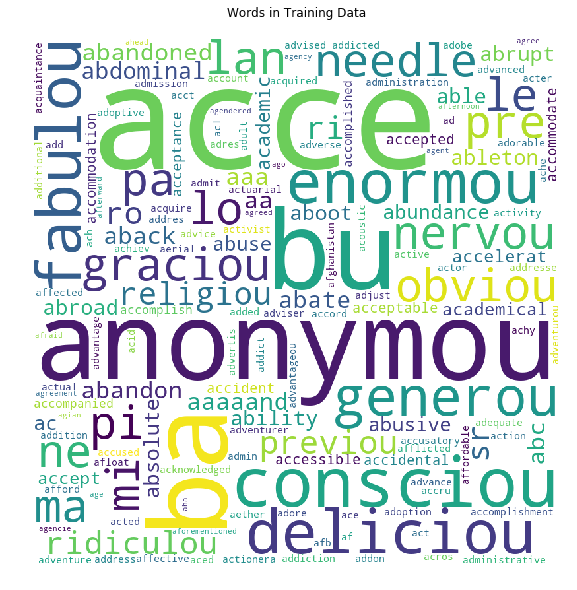

In [0]:
request_words = ""
stopwords = set(STOPWORDS) 
  
# iterate through the column
for val in features: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens:
        request_words = request_words + words + " "
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = "white", 
                      stopwords = stopwords, 
                      min_font_size = 10).generate(request_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Words in Training Data\n")
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

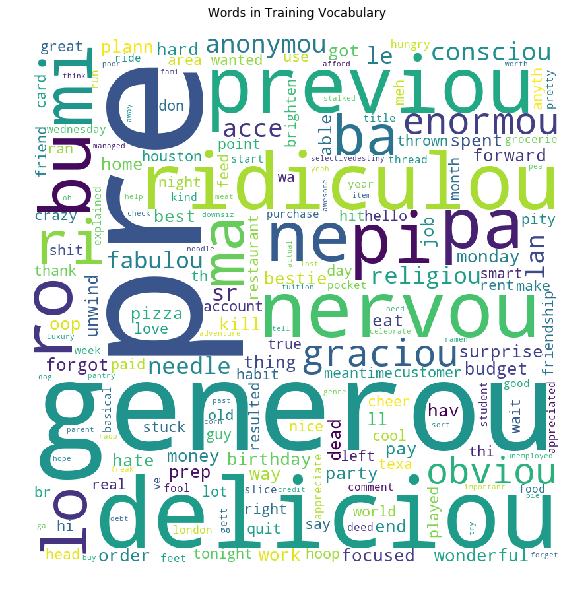

In [0]:
request_words = ""
stopwords = set(STOPWORDS) 
  
# iterate through the column
for val in vocab: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens:
        request_words = request_words + words + " "
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = "white", 
                      stopwords = stopwords, 
                      min_font_size = 10).generate(request_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Words in Training Vocabulary\n")
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Model - Naives Bayes

In [0]:
def train_model(best_alpha, x_train, x_dev):
    
    
    clf_m = MultinomialNB(alpha = best_alpha)
    clf_m.fit(x_train, y_train)
    mn_pred = clf_m.predict(x_dev)
    mn_score = metrics.f1_score(y_dev, mn_pred, average = "micro")
    print("The f1-score for MultinomialNB with alpha =", str(best_alpha), "is", "{:.3f}".format(mn_score), "\n")

In [0]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(x_train)

# transform the training and testing data using count vectorizer object
xtrain_count = count_vect.transform(x_train)
xdev_count = count_vect.transform(x_dev)

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(x_train)
xtrain_tfidf = tfidf_vect.transform(x_train)
xdev_tfidf = tfidf_vect.transform(x_dev)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(x_train)
xtrain_tfidf_ngram = tfidf_vect_ngram.transform(x_train)
xdev_tfidf_ngram = tfidf_vect_ngram.transform(x_dev)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(x_train)
xtrain_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(x_train) 
xdev_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(x_dev) 

In [0]:
alpha = 11.5

# Naive Bayes on Count Vectors
print ("NB, Count Vectors: ")
accuracy = train_model(alpha, xtrain_count, xdev_count)


# Naive Bayes on Word Level TF IDF Vectors
print ("\nNB, WordLevel TF-IDF: ")
accuracy = train_model(alpha, xtrain_tfidf, xdev_tfidf)


# Naive Bayes on Ngram Level TF IDF Vectors
print ("\nNB, N-Gram Vectors: ")
accuracy = train_model(alpha, xtrain_tfidf_ngram, xdev_tfidf_ngram)


# Naive Bayes on Character Level TF IDF Vectors
print ("\nNB, CharLevel Vectors: ")
accuracy = train_model(alpha, xtrain_tfidf_ngram_chars, xdev_tfidf_ngram_chars)


NB, Count Vectors: 
The f1-score for MultinomialNB with alpha = 11.5 is 0.751 


NB, WordLevel TF-IDF: 
The f1-score for MultinomialNB with alpha = 11.5 is 0.752 


NB, N-Gram Vectors: 
The f1-score for MultinomialNB with alpha = 11.5 is 0.752 


NB, CharLevel Vectors: 
The f1-score for MultinomialNB with alpha = 11.5 is 0.752 



### Oddly enough, all have similar accuracy.

## Model - Decision Tree

Here we explore using decision trees to predict the outcome. We start with a simple decision tree then try a random forest to see if that improves the result.

In [0]:
# decision trees can't handle text without preprocessing, so we exclude those fields. Maybe we will try again with preprocessing later.

train_columns = ['total_posts_in_raop',
                'total_comments_in_raop',
                'words_count_text',
                'words_count_title',
                'first_post_age',
                'request_text_has_url',
                'emoticon_smile',
                'account_age',
                'total_subreddits',
                'total_comments',
                'upvotes_minus_downvotes',
                'upvotes_plus_downvotes',
                'total_posts',
                'emoticon_sad'
                ]

X_sup = train_data[train_columns]
Y_sup = train_data["received_pizza"].to_numpy()

X_sup_train, X_sup_dev, Y_sup_train, Y_sup_dev = train_test_split(X_sup, Y_sup, test_size=0.33, random_state=42)

## Unbalanced Random Forest

In [0]:
clf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=0)
                             
clf.fit(X_sup_train, Y_sup_train)
                 
X_sup_dev_prediction = clf.predict(X_sup_dev)
X_sup_dev_prediction_proba = clf.predict_proba(X_sup_dev)

print("Accuracy score: " + "{:.3f}".format(sklearn.metrics.accuracy_score(X_sup_dev_prediction,Y_sup_dev)))
print("F-1 score: " + "{:.3f}".format(sklearn.metrics.f1_score(X_sup_dev_prediction,Y_sup_dev, average="weighted")))

#print(sum(X_sup_dev_prediction == True))

Accuracy score: 0.756
F-1 score: 0.852


In [0]:
prediction_count = Counter(X_sup_dev_prediction)
pred_false = prediction_count[0]
pred_true = prediction_count[1]
pred_total = pred_false + pred_true

pred_percent_false = pred_false/pred_total

print('Number of rows predicted false: ' + str(pred_false))
print('Number of rows predicted true: '+ str(pred_true))
print('Percent of rows predicted false: ' + "{:.2f}".format(pred_percent_false*100) +'%')

train_label_count = Counter(Y_sup_train)
train_false = train_label_count[0]
train_true = train_label_count[1]
train_total = train_false + train_true

train_percent_false = train_false/train_total

print('\nNumber of training rows labeld false: ' + str(train_false))
print('Number of training rows labeld true: '+ str(train_true))
print('Percent of training rows labeld false: ' + "{:.2f}".format(train_percent_false*100) +'%')

Number of rows predicted false: 1320
Number of rows predicted true: 14
Percent of rows predicted false: 98.95%

Number of training rows labeld false: 2043
Number of training rows labeld true: 663
Percent of training rows labeld false: 75.50%


Since decision trees make their decision splits by taking a feature and a threshold to try to minize the Gini impurity, we can measure the importance of various features by measuring what proportion of the total Gini impurity decrease splits with that feature account for. Features with higher importance in this scheme are present in a lot of important splits per tree. We see that in this account, the most important features are: 


*   The number of total comments
*   Word count of the main body of the post
*   Net votes received
*   Age of the account

These are all sensible, as high traffic popular and detailed posts from a well known and long-active user intuitively should attract more pizza. 


 Feature Importance
 1) total_comments_in_raop         0.227957
 2) words_count_text               0.219571
 3) upvotes_plus_downvotes         0.097308
 4) upvotes_minus_downvotes        0.094357
 5) account_age                    0.086964
 6) first_post_age                 0.059308
 7) words_count_title              0.052356
 8) total_subreddits               0.049343
 9) total_posts                    0.044126
10) total_posts_in_raop            0.025438
11) total_comments                 0.024227
12) request_text_has_url           0.016401
13) emoticon_smile                 0.002643
14) emoticon_sad                   0.000000


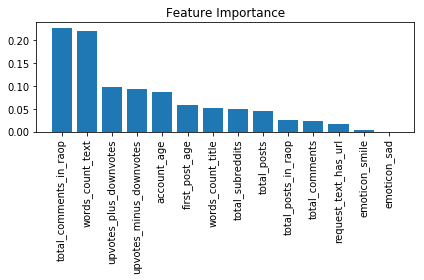

In [0]:
print("\n Feature Importance")
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]
for f in range(X_sup_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, train_columns[indices[f]], importances[indices[f]]))
  
plt.title("Feature Importance")
plt.bar(range(X_sup_train.shape[1]), importances[indices], align = 'center')

plt.xticks(range(X_sup_train.shape[1]), X_sup.columns[indices] ,rotation = 90)

plt.xlim([-1, X_sup_train.shape[1]])

plt.tight_layout()
plt.show()


ROC AUC: 0.634


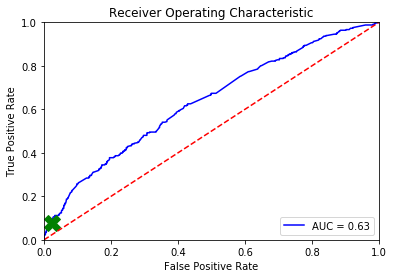

In [0]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(Y_sup_dev, X_sup_dev_prediction_proba[:,1])
roc_auc = sklearn.metrics.auc(fpr, tpr)
half_threshold_index = np.argmin(np.abs(threshold-0.4))

print("ROC AUC: " + "{:.3f}".format(roc_auc))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr[half_threshold_index], tpr[half_threshold_index], "gX", markersize=16)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Oversampling

In [0]:
oversampler = SMOTE(random_state=0)
X_sup_train_new, Y_sup_train_new = oversampler.fit_sample(X_sup_train,Y_sup_train)

Accuracy score: 0.683
F-1 score: 0.682

 Feature Importance
 1) words_count_text               0.167014
 2) words_count_title              0.105820
 3) total_comments_in_raop         0.082831
 4) account_age                    0.082769
 5) upvotes_minus_downvotes        0.075951
 6) upvotes_plus_downvotes         0.072227
 7) total_comments                 0.067757
 8) total_subreddits               0.067707
 9) first_post_age                 0.064789
10) request_text_has_url           0.060195
11) total_posts                    0.057297
12) emoticon_smile                 0.055980
13) total_posts_in_raop            0.028637
14) emoticon_sad                   0.011025


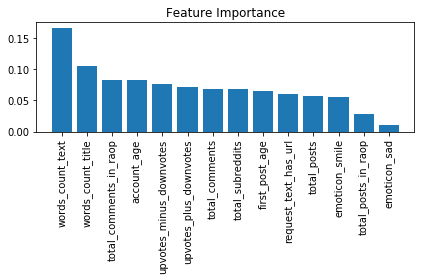

ROC AUC: 0.615


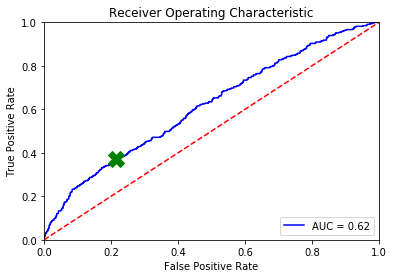

Prediction Counter:


Counter({False: 996, True: 338})

In [0]:
clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0, class_weight="balanced")
                            
clf.fit(X_sup_train_new, Y_sup_train_new)
                 
X_sup_dev_prediction = clf.predict(X_sup_dev)
X_sup_dev_prediction_proba = clf.predict_proba(X_sup_dev)

print("Accuracy score: " + "{:.3f}".format(sklearn.metrics.accuracy_score(X_sup_dev_prediction,Y_sup_dev)))
print("F-1 score: " + "{:.3f}".format(sklearn.metrics.f1_score(X_sup_dev_prediction,Y_sup_dev, average="weighted")))


print("\n Feature Importance")
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]
for f in range(X_sup_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, train_columns[indices[f]], importances[indices[f]]))
  
plt.title("Feature Importance")
plt.bar(range(X_sup_train.shape[1]), importances[indices], align = 'center')

plt.xticks(range(X_sup_train.shape[1]), X_sup.columns[indices] ,rotation = 90)

plt.xlim([-1, X_sup_train.shape[1]])

plt.tight_layout()
plt.show()


fpr, tpr, threshold = sklearn.metrics.roc_curve(Y_sup_dev, X_sup_dev_prediction_proba[:,1])
roc_auc = sklearn.metrics.auc(fpr, tpr)
half_threshold_index = np.argmin(np.abs(threshold-0.5))

print("ROC AUC: " + "{:.3f}".format(roc_auc))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr[half_threshold_index], tpr[half_threshold_index], "gX", markersize=16)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("Prediction Counter:")
Counter(X_sup_dev_prediction)

In [0]:
prediction_count = Counter(X_sup_dev_prediction)
pred_false = prediction_count[0]
pred_true = prediction_count[1]
pred_total = pred_false + pred_true

pred_percent_false = pred_false/pred_total

print('Number of rows predicted false: ' + str(pred_false))
print('Number of rows predicted true: '+ str(pred_true))
print('Percent of rows predicted false: ' + "{:.2f}".format(pred_percent_false*100) +'%')


train_label_count = Counter(Y_sup_train)
train_false = train_label_count[0]
train_true = train_label_count[1]
train_total = train_false + train_true

train_percent_false = train_false/train_total

print('\nNumber of training rows labeld false: ' + str(train_false))
print('Number of training rows labeld true: '+ str(train_true))
print('Percent of training rows labeld false: ' + "{:.2f}".format(train_percent_false*100) +'%')

Number of rows predicted false: 996
Number of rows predicted true: 338
Percent of rows predicted false: 74.66%

Number of training rows labeld false: 2043
Number of training rows labeld true: 663
Percent of training rows labeld false: 75.50%


## Model - Baseline
    This model was created as the Baseline model, to provide some insights and setup the base for later modelings.
   

In [0]:
# !wget -q -P /content/ http://cs.stanford.edu/~althoff/raop-dataset/pizza_request_dataset.tar.gz
# !tar xzf /content/pizza_request_dataset.tar.gz
# !pip install ggplot
# !pip install pandas==0.19.2

For checkpoint:

Plan is to create a baseline model that predicts yes pizza if requester_upvotes_minus_downvotes_at_request feature is greater than some threshold. We can then pick a threshold we like, report pecision, recall, F-1. We can also draw a ROC curve and report AUC metric. 

In [0]:
class BaseLineThresholdModel(sklearn.base.BaseEstimator):
  """
  BaseLine Static Threshold Model class. 
  
  This model extends the BaseEstimator class given in sklearn and conforms to 
  the sklearn model API.
  This model predicts based on a threshold for a feature value that is set prior
  to training. As a result, there is no training step. 
  """
  
  def __init__(self, threshold=0.0, use_greater=False):
    """
    Constructor.
    
    Parameters
    ----------
    threshold : float
      Threshold to set for the feature value.
    use_greater : bool
      Whether to predict using a greater than or less than logic.

    """
    self.threshold = threshold
    self.use_greater = use_greater
    
  def fit(self, X, y):
    """
    This model does not do anything with the training data.
    """
    pass
  
  def predict(self, X):
    """
    Predicts label values.
    
    Parameters
    ----------
    X : array
      Input Data. Must be 1-dimensional! 
    
    Returns
    ----------
    bool
      Predicts True if feature value is greater than threshold and use_greater 
      is True. Vice versa if use_greater is false.
    """
    if self.use_greater:
      return (X > self.threshold).astype(np.int)
    else:
      return (X < self.threshold).astype(np.int)

In [0]:
X = np.expand_dims(train_data['upvotes_minus_downvotes'].values.astype(float), axis=1)
Y = train_data['received_pizza'].values.astype(int)

X_train, X_dev, Y_train, Y_dev = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=1)
    
X_test = np.expand_dims(test_data['upvotes_minus_downvotes'].values.astype(float), axis=1)

In [0]:
baseline_model = BaseLineThresholdModel()
base_grid_search = sklearn.model_selection.GridSearchCV(baseline_model, {"threshold": [i*100 for i in range(50)], "use_greater":[True, False]}, cv=5, scoring="f1_weighted")
base_grid_search.fit(X_train, Y_train)
print(sklearn.metrics.f1_score(base_grid_search.predict(X_dev),Y_dev, average="weighted"))
print(sklearn.metrics.accuracy_score(base_grid_search.predict(X_dev),Y_dev))
print(base_grid_search.best_params_)


0.7006536750477932
0.6823432343234324
{'threshold': 1900, 'use_greater': True}


In [0]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(Y_dev, X_dev.flatten())
roc_auc = sklearn.metrics.auc(fpr, tpr)
print(roc_auc)

0.5499195370225258


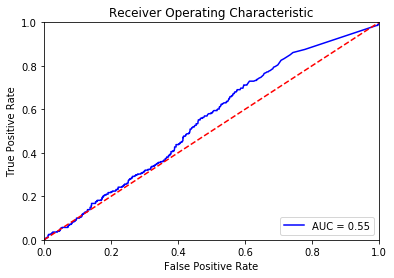

In [0]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Our dev ROC AUC score of .55 and the non-flat curve show that we are doing better than random. Our best model using Grid Search predicts pizza will be received for posts getting 1900 more upvotes than downvotes, which gives a f1 score of .700 and an accuracy score of 68.2%.   


## Common and Frequently Used words 

    What words will likely get you pizza?

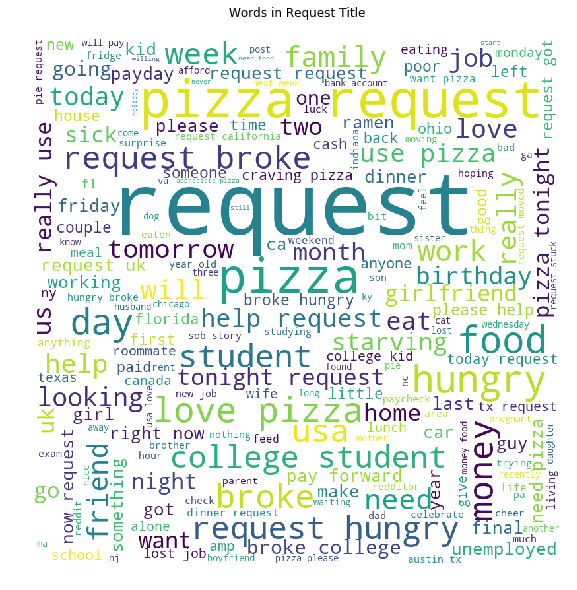

In [0]:
request_words = ""
stopwords = set(STOPWORDS) 
  
# iterate through the column
for val in train_data["request_title"]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens:
        request_words = request_words + words + " "
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = "white", 
                      stopwords = stopwords, 
                      min_font_size = 10).generate(request_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Words in Request Title\n")
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

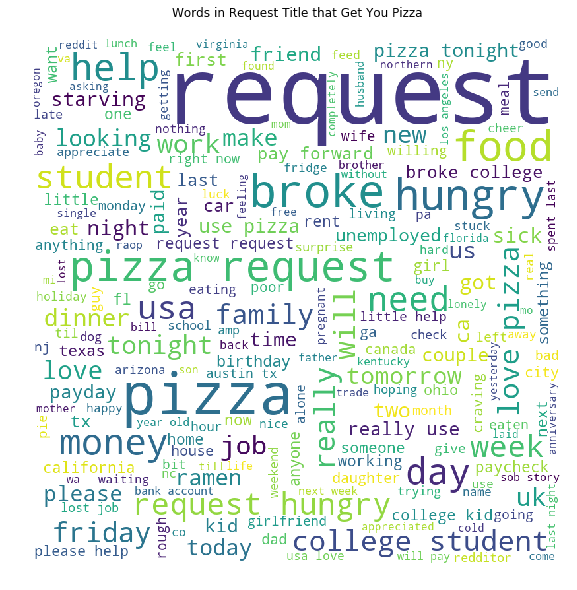

In [0]:
request_words = ""
stopwords = set(STOPWORDS) 
  
# iterate through the column
for val in pizza_true["request_title"]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens:
        request_words = request_words + words + " "
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = "white", 
                      stopwords = stopwords, 
                      min_font_size = 10).generate(request_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Words in Request Title that Get You Pizza\n")
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

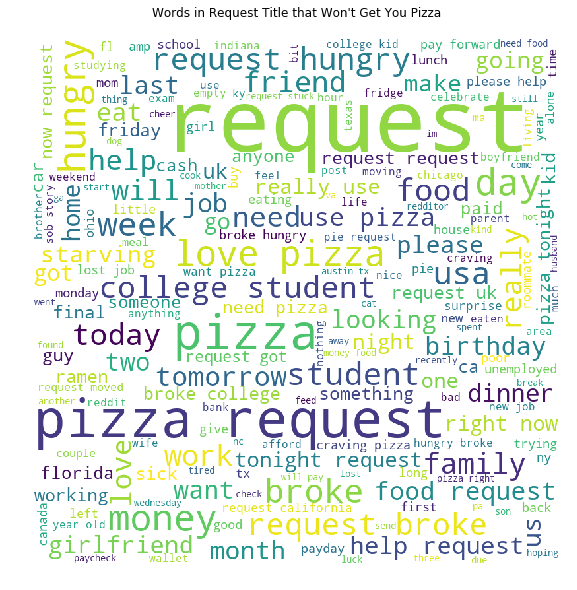

In [0]:
request_words = ""
stopwords = set(STOPWORDS) 
  
# iterate through the column
for val in pizza_false["request_title"]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens:
        request_words = request_words + words + " "
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = "white", 
                      stopwords = stopwords, 
                      min_font_size = 10).generate(request_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Words in Request Title that Won't Get You Pizza\n")
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

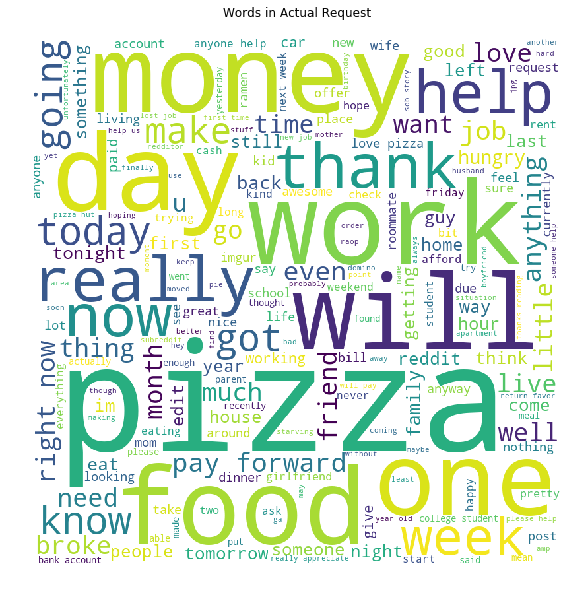

In [0]:
request_words = ""
stopwords = set(STOPWORDS) 
  
# iterate through the column
for val in train_data["request_text_clean"]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens:
        request_words = request_words + words + " "
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = "white", 
                      stopwords = stopwords, 
                      min_font_size = 10).generate(request_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Words in Actual Request\n")
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

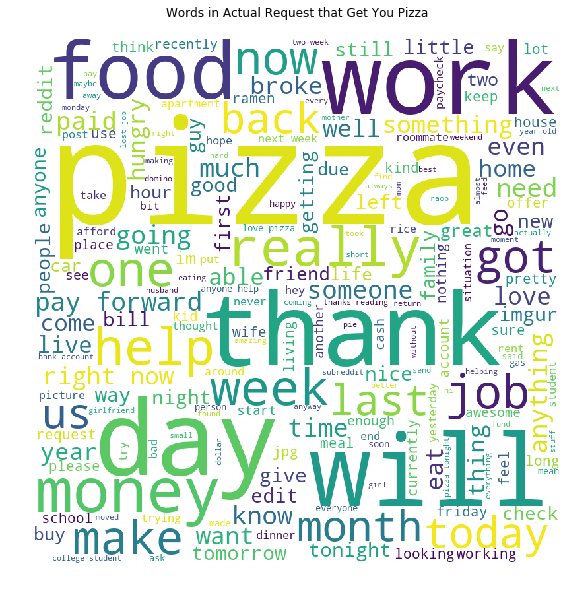

In [0]:
request_words = ""
stopwords = set(STOPWORDS) 
  
# iterate through the column
for val in pizza_true["request_text_clean"]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens:
        request_words = request_words + words + " "
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = "white", 
                      stopwords = stopwords, 
                      min_font_size = 10).generate(request_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Words in Actual Request that Get You Pizza\n")
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

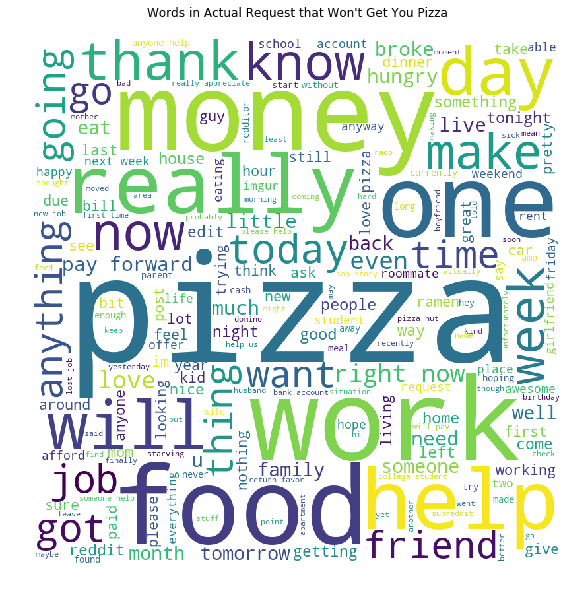

In [0]:
request_words = ""
stopwords = set(STOPWORDS) 
  
# iterate through the column
for val in pizza_false["request_text_clean"]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens:
        request_words = request_words + words + " "
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = "white", 
                      stopwords = stopwords, 
                      min_font_size = 10).generate(request_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Words in Actual Request that Won't Get You Pizza\n")
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Notes


In [0]:
# !wget -q -P /content/ http://cs.stanford.edu/~althoff/raop-dataset/pizza_request_dataset.tar.gz
# !tar xzf /content/pizza_request_dataset.tar.gz

### INTRODUCTION: Some notes on a couple of problems we are up against:
- it is hard to measure wit of the person asking for pizza it is not captured by the length of the text
- Like any other social media platform, the RAOP platform can be used for political statements/opinions where people agree or disagree with but might have nothing to do with actual pizza
- It is hard to measure 'beleivability' of the requestor. On first read some of the requests seemed more beleivalbe than others
- It is hard to measure when request is 'personal'
- We think people are likely to donate a pizza if they have emotional reaction to the requestors text and profile. How do we measure 'emotional response'?
The 3 main factors we can try to focus on in EDA:
    - request text (anything that we can extract and clasify)
    - profile of the requestor (past actions)
    - profile of the donor (past actions)

In [0]:
#crete new variable "Net Votes": the net total of up and down request votes
# TODO: can we remove this?
train_data['net_votes'] = train_data['upvotes_minus_downvotes']
test_data['net_votes'] = test_data['upvotes_minus_downvotes']


The question we are trying to answer here is how the data is split depending who gets the votes and who gets the pizza.


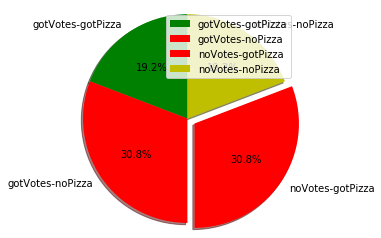

In [0]:
import matplotlib.pyplot as plt
 
# Got pizza
activities = ['gotVotes-gotPizza', 'gotVotes-noPizza', 'noVotes-gotPizza', 'noVotes-noPizza']

# portion covered by each label

yesVotesYesPizza=len(train_data[train_data.received_pizza ==True \
                  & (train_data.upvotes_minus_downvotes > 0)])

yesVotesNoPizza=len(train_data[train_data.received_pizza != True \
                  & (train_data.upvotes_minus_downvotes > 0)])

noVotesYesPizza=len(train_data[train_data.received_pizza ==True \
                  & (train_data.upvotes_minus_downvotes <= 0)])

noVotesNoPizza=len(train_data[train_data.received_pizza != True \
                  & (train_data.upvotes_minus_downvotes <= 0)])
slices = [yesVotesYesPizza, yesVotesNoPizza, noVotesYesPizza, noVotesNoPizza]

# color for each label
colors = ['g', 'r', 'r', 'y'] #colors = ['r', 'y', 'g', 'b']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,  
        startangle=90, shadow = True, explode = (0, 0, 0.1, 0),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()


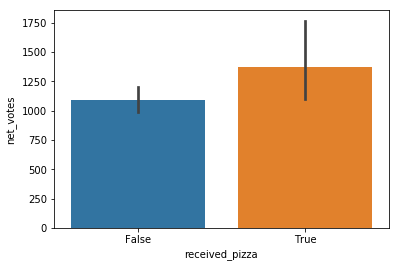

In [0]:
import seaborn as sns

sns.barplot(x=train_data.received_pizza,y=train_data.net_votes)

The intuition here suggests that relationship between votes and winning pizza is not intuitive, we were expecting to find bigger percentage of the graph allocated to gotVotes-gotPizza and noVotes-noPizza sections.

Looking at averages across the board from pizza rec'd

In [0]:
# apply seaborn style to all graphs going-forward
sns.set_style("darkgrid")

<Figure size 1296x1296 with 0 Axes>

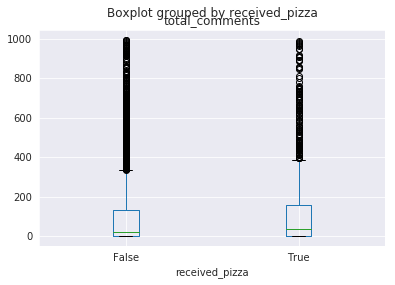

In [0]:
plt.figure(figsize=(18,18))
train_data.boxplot(column="total_comments", by='received_pizza')

In [0]:
train_data["words_count_text"] = train_data.apply(lambda row: len(row.request_text_clean.split()), axis = 1)
train_data["words_count_title"] = train_data.apply(lambda row: len(row.request_title.split()), axis = 1)

In [0]:
train_data.head()

,request_text,request_title,account_age,first_post_age,total_comments,total_comments_in_raop,total_posts,total_posts_in_raop,total_subreddits,received_pizza,subreddits,upvotes_minus_downvotes,upvotes_plus_downvotes,username,unix_timestamp,unix_timestamp_utc,request_text_clean,request_text_has_url,emoticon_smile,emoticon_sad,words_count_text,words_count_title,day_of_week_local,hour_local,hour_utc,starts_with_greeting,cluster,net_votes
0,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,0.000000,0,0,0,0,0,False,[],0,0,nickylvst,1317852607,1317849007,Hi I am in need of food for my 4 children we a...,False,False,False,67,6,2,22,21,True,3,0
1,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,0.000000,0,0,15,0,12,False,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,116,fohacidal,1332652424,1332648824,I spent the last money I had on gas today. Im ...,False,False,True,16,10,6,5,4,False,1,34
2,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,0.000000,0,0,0,0,0,False,[],0,0,jacquibatman7,1319650094,1319646494,My girlfriend decided it would be a good idea ...,False,False,False,59,10,2,17,16,False,3,0
3,"It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,0.000000,36,0,1,0,4,False,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,76,4on_the_floor,1322855434,1322855434,"It's cold, I'n hungry, and to be completely ho...",False,False,False,30,11,4,19,19,False,1,54
4,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,101.606505,140,2,14,0,11,False,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1733,Futuredogwalker,1373657691,1373654091,hey guys:\n I love this sub. I think it's grea...,False,True,False,103,14,4,19,18,True,0,1121


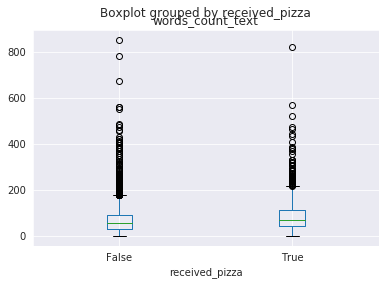

In [0]:
train_data.boxplot(column="words_count_text", by='received_pizza')

In [0]:
train_pizza_avg

,account_age,first_post_age,total_comments,total_comments_in_raop,total_posts,total_posts_in_raop,total_subreddits,upvotes_minus_downvotes,upvotes_plus_downvotes,unix_timestamp,unix_timestamp_utc,request_text_has_url,emoticon_smile,emoticon_sad,words_count_text,words_count_title,day_of_week_local,hour_local,hour_utc,starts_with_greeting
received_pizza,,,,,,,,,,,,,,,,,,,,
False,247.348502,12.453199,111.368352,0.389035,21.002298,0.038083,17.609324,1090.904465,3358.015430,1.344206e+09,1.344203e+09,0.061064,0.084045,0.029219,71.639527,12.360144,2.936967,12.160210,12.937951,0.109324
True,276.766844,28.563757,126.528169,1.429577,23.437626,0.141851,19.509054,1372.060362,4923.700201,1.338609e+09,1.338606e+09,0.101610,0.113682,0.022133,89.928571,12.613682,2.887324,12.413481,13.285714,0.121730


In [0]:
train_pizza_count = train_pizza.count()

In [0]:
train_pizza_avg["total_posts"]

received_pizza
False    21.002298
True     23.437626
Name: total_posts, dtype: float64

In [0]:
train_pizza_avg["total_comments"]

received_pizza
False    111.368352
True     126.528169
Name: total_comments, dtype: float64

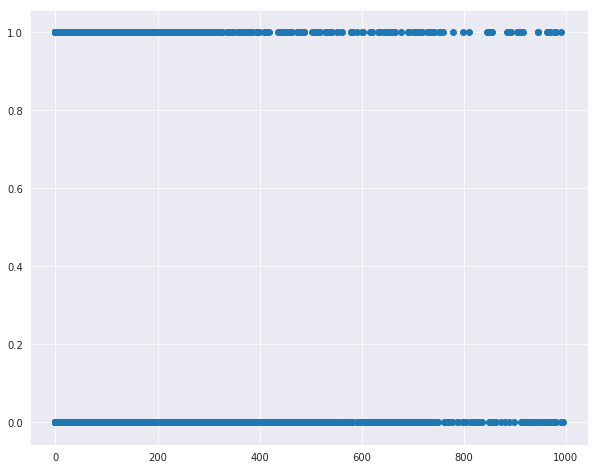

In [0]:
plt.figure(figsize=(10,8))


x = train_data["total_comments"]
y = train_data["received_pizza"]
    
plt.scatter(x, y) 